In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('results/trump_results_expanded.csv')
display(df.head())

/var/folders/sn/hvdpnw3n7l35_lcfs2ppcb_80000gn/T/ipykernel_17146/3019867993.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results/trump_results_expanded.csv')


text                 date  \
0  join me live in raleigh, north carolina at 10 ...  2024-11-04 10:20:38   
1                 https : / / swampthevoteusa. com /  2024-11-04 10:20:27   
2                          make america great again!  2024-11-04 09:56:53   
3                       “ america is being invaded ”  2024-11-04 09:36:27   
4  a great day in pennsylvania, north carolina, a...  2024-11-04 09:17:13   

   favorites isRetweet  retweets  sentiment  respect  insult  humiliate  \
0       3983     False      1554        0.0      0.0     0.0        0.0   
1       2527     False       713        0.0      0.0     0.0        0.0   
2       4816     False      1329        1.0      1.0     0.0        0.0   
3       6672     False      2232        1.0      1.0     0.0        0.0   
4       5338     False      2052        0.0      0.0     0.0        0.0   

   status  ...  target_age_other  target_age  target_disability_physical  \
0     0.0  ...               0.0         0.0                         0.0   
1     0.0  ...               0.0         0.0                         0.0   
2     0.0  ...               0.0         0.0                         0.0   
3     0.0  ...               0.0         0.0                         0.0   
4     0.0  ...               0.0         0.0                         0.0   

   target_disability_cognitive  target_disability_neurological  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   target_disability_visually_impaired  target_disability_hearing_impaired  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

   target_disability_unspecific  target_disability_other  target_disability  
0                           0.0                      0.0                0.0  
1                           0.0                      0.0                0.0  
2                           0.0                      0.0                0.0  
3                           0.0                      0.0                0.0  
4                           0.0                      0.0                0.0  

[5 rows x 69 columns]

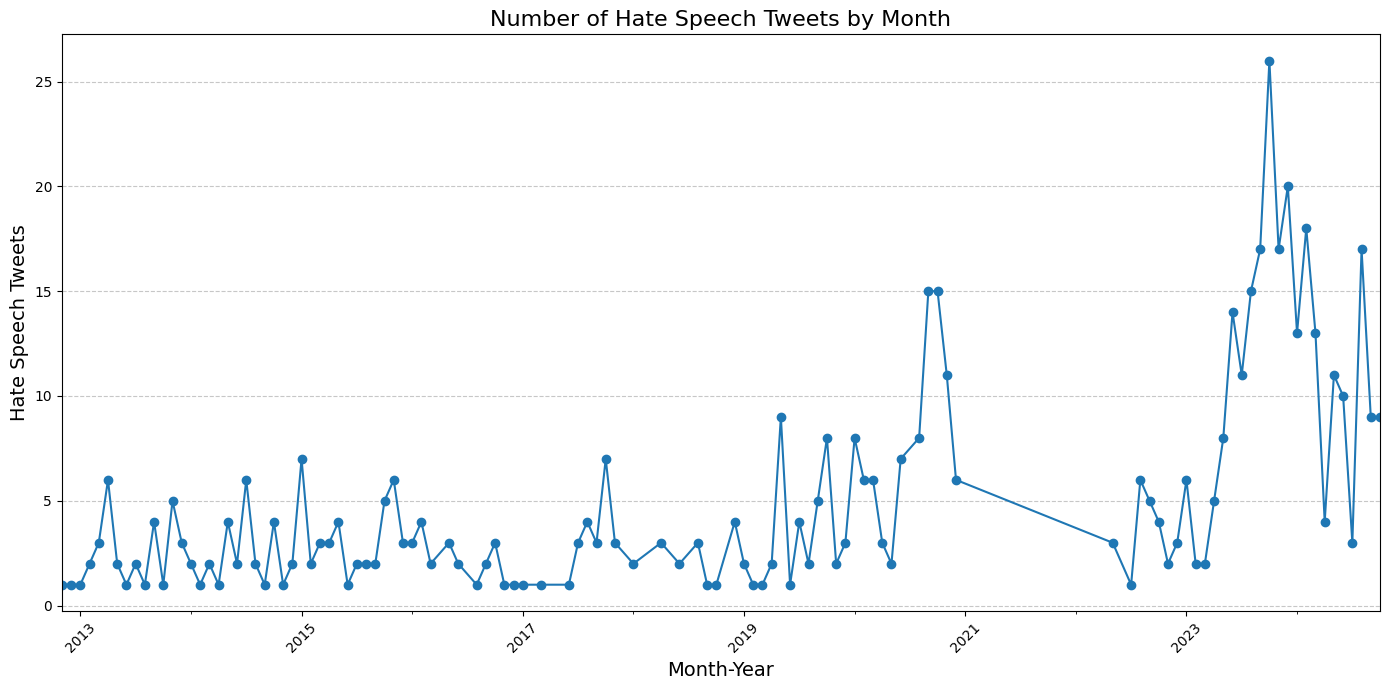

In [3]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# Group and calculate percentage
monthly_total = df.groupby('month_year').size()
monthly_count = df[df['hate_speech_score'] > 0].groupby('month_year').size()
monthly_percent = (monthly_count / monthly_total * 100).fillna(0)

# Plot
plt.figure(figsize=(14, 7))
monthly_count.sort_index().plot(kind='line', marker='o', figsize=(14, 7))

plt.title('Number of Hate Speech Tweets by Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Hate Speech Tweets', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()



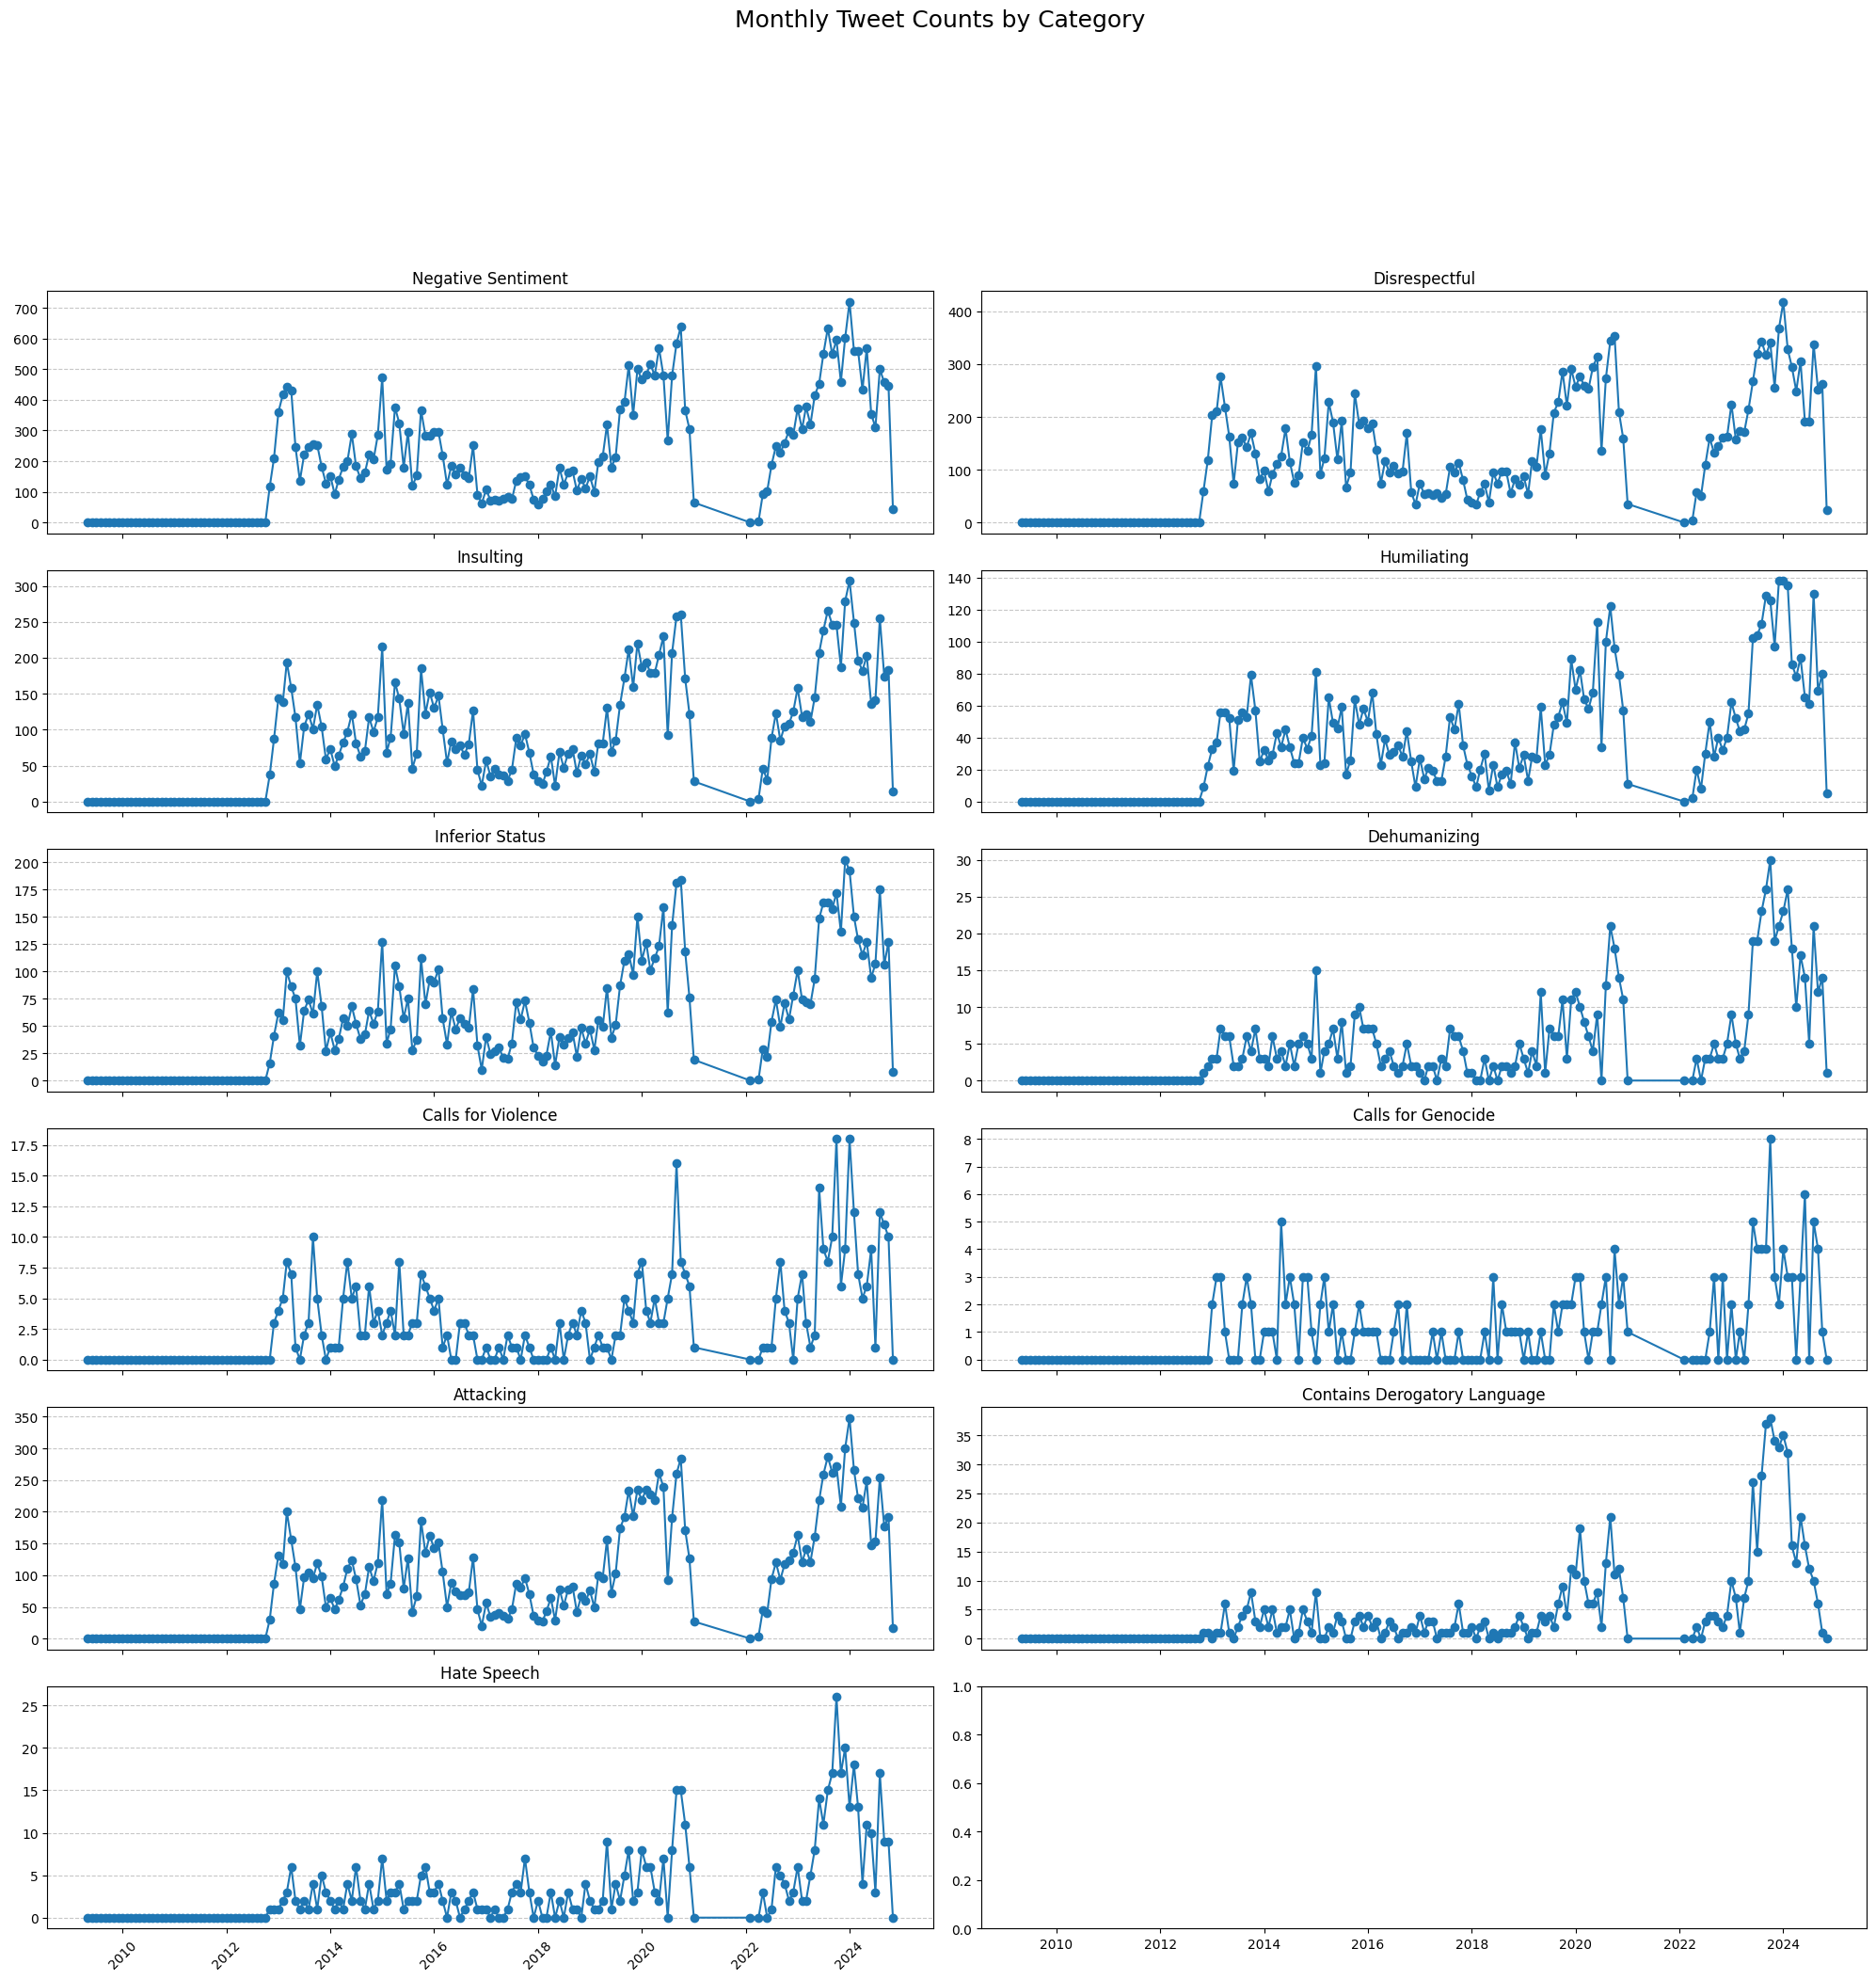

In [4]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'sentiment', 'respect', 'insult', 'humiliate', 'status',
    'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score'
]

column_names = [
    'Negative Sentiment', 'Disrespectful', 'Insulting', 'Humiliating', 'Inferior Status', 
    'Dehumanizing', 'Calls for Violence', 'Calls for Genocide', 'Attacking', 'Contains Derogatory Language', 'Hate Speech'
]

# Prepare figure
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Category', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()


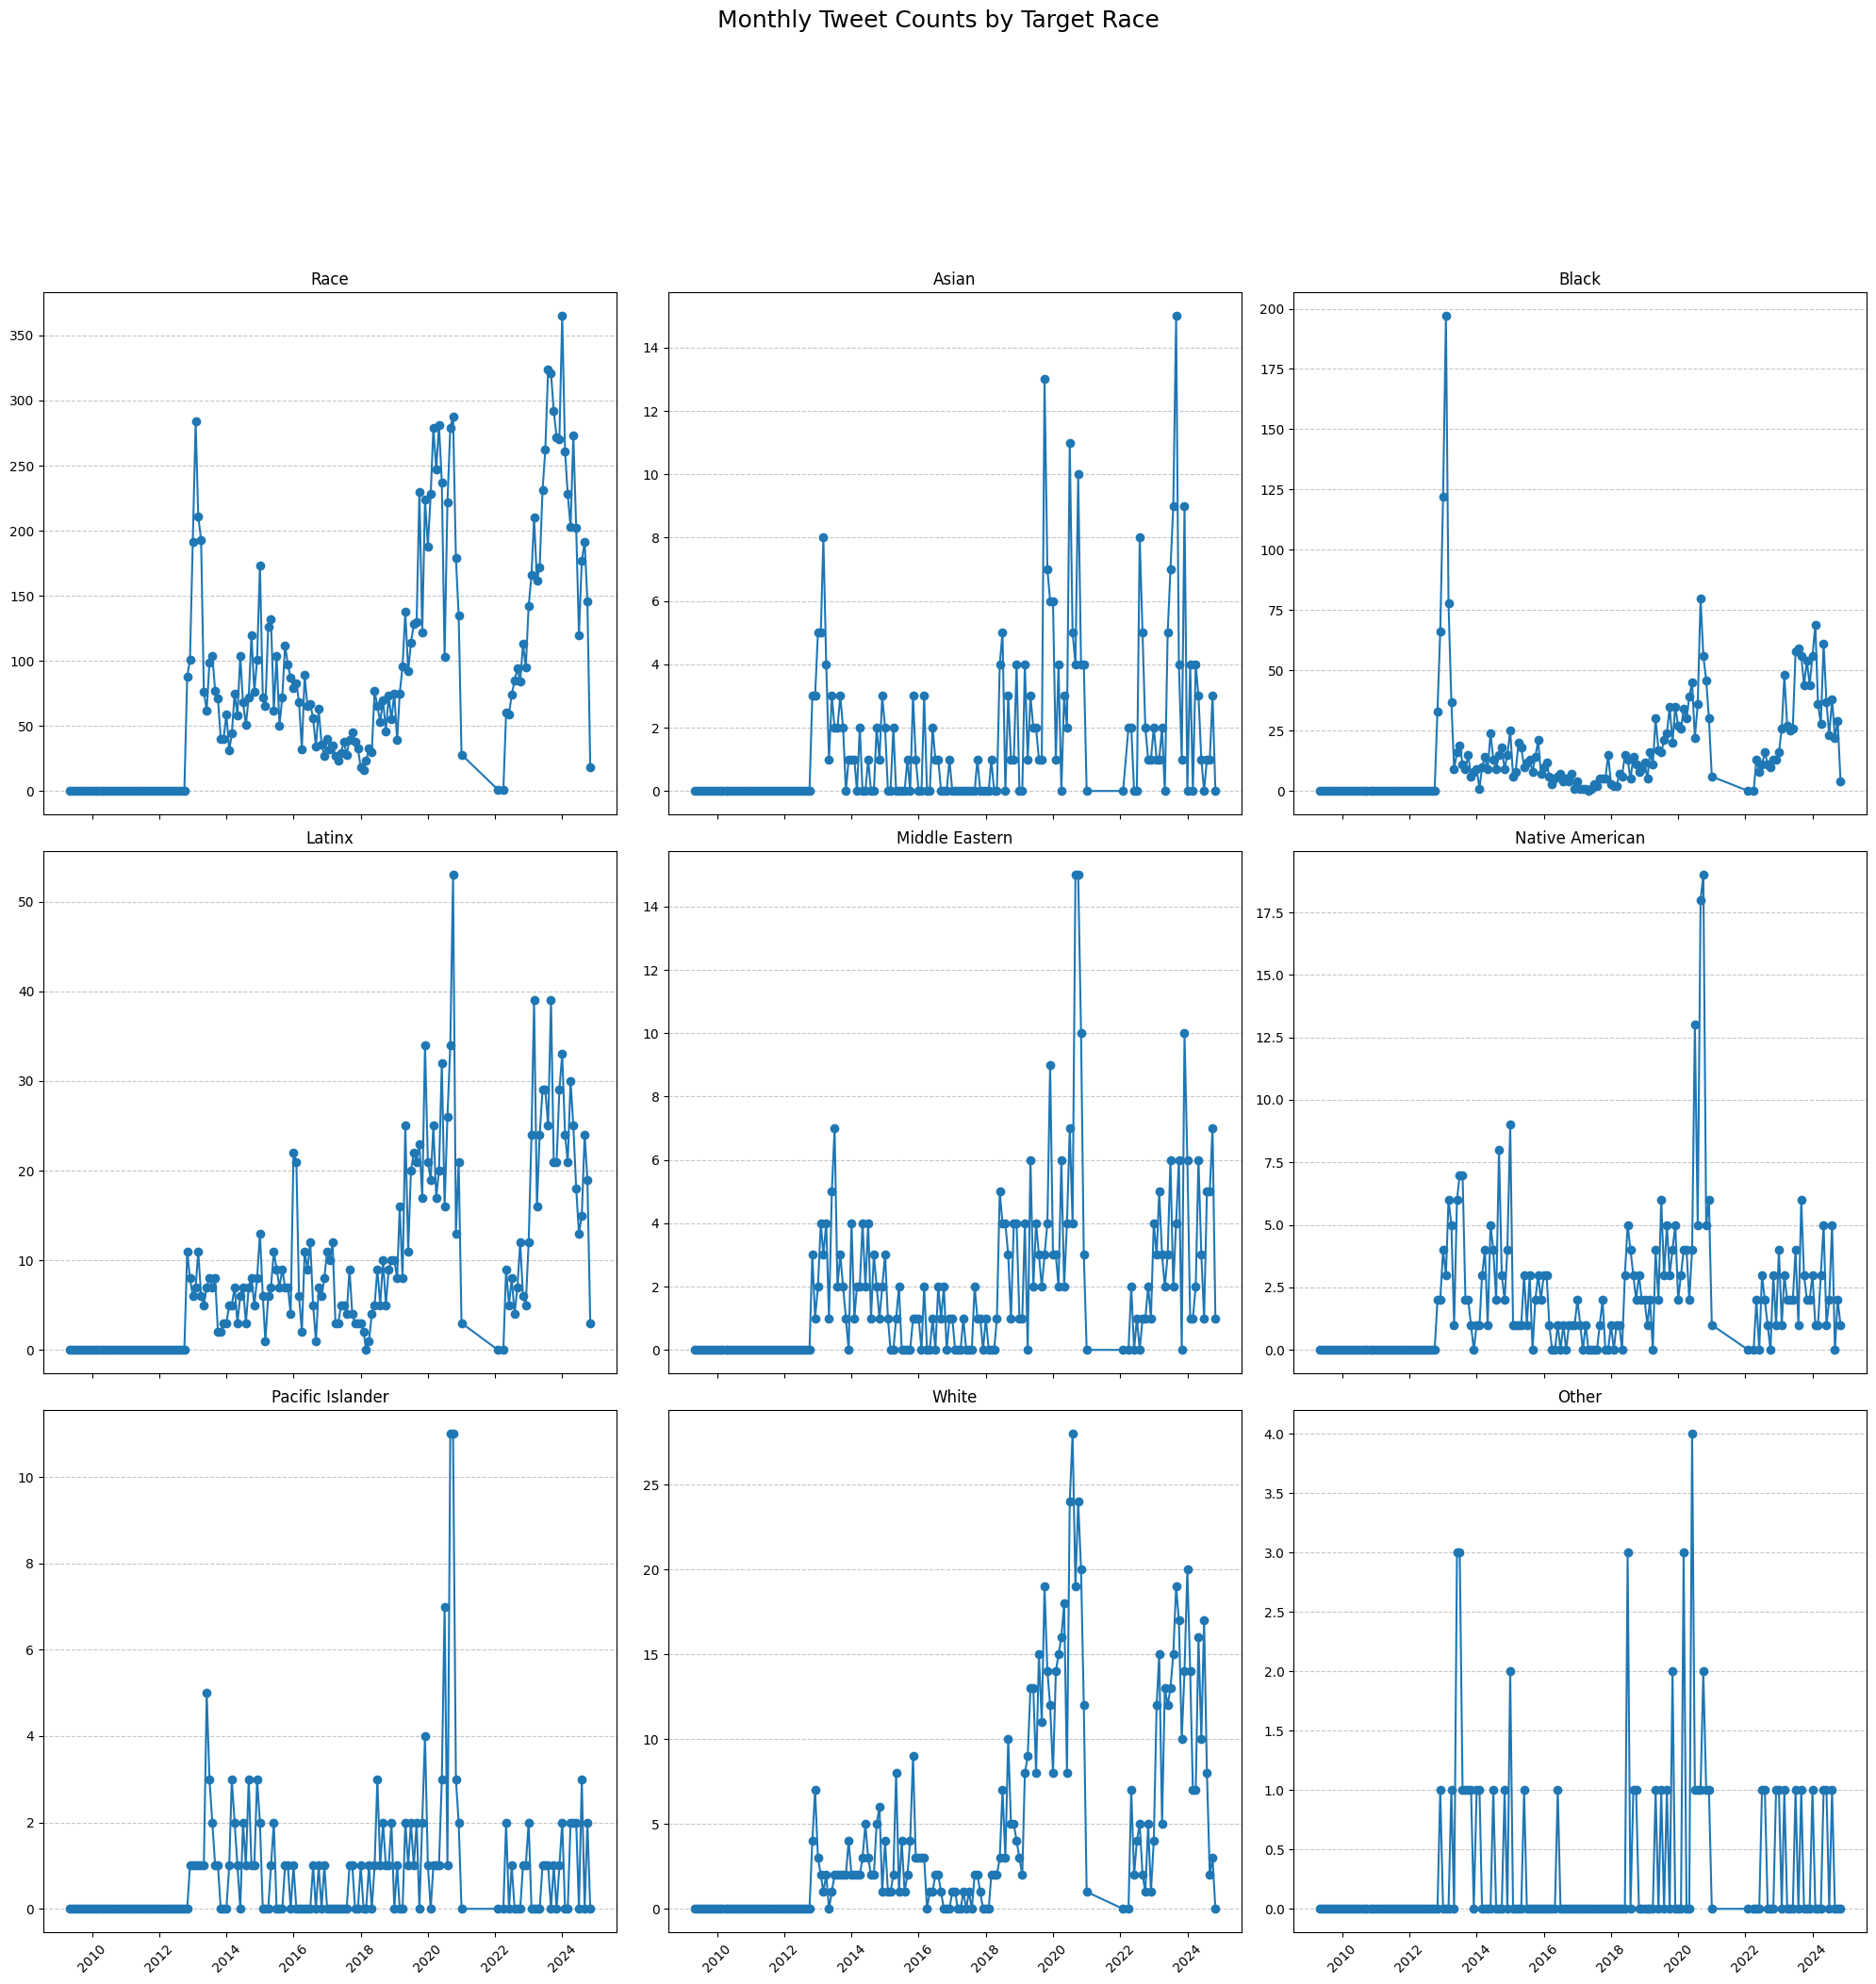

In [6]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'target_race', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern', 
    'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_race_other'
]

column_names = [
    'Race', 'Asian', 'Black', 'Latinx', 'Middle Eastern', 
    'Native American', 'Pacific Islander', 'White', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Race', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()


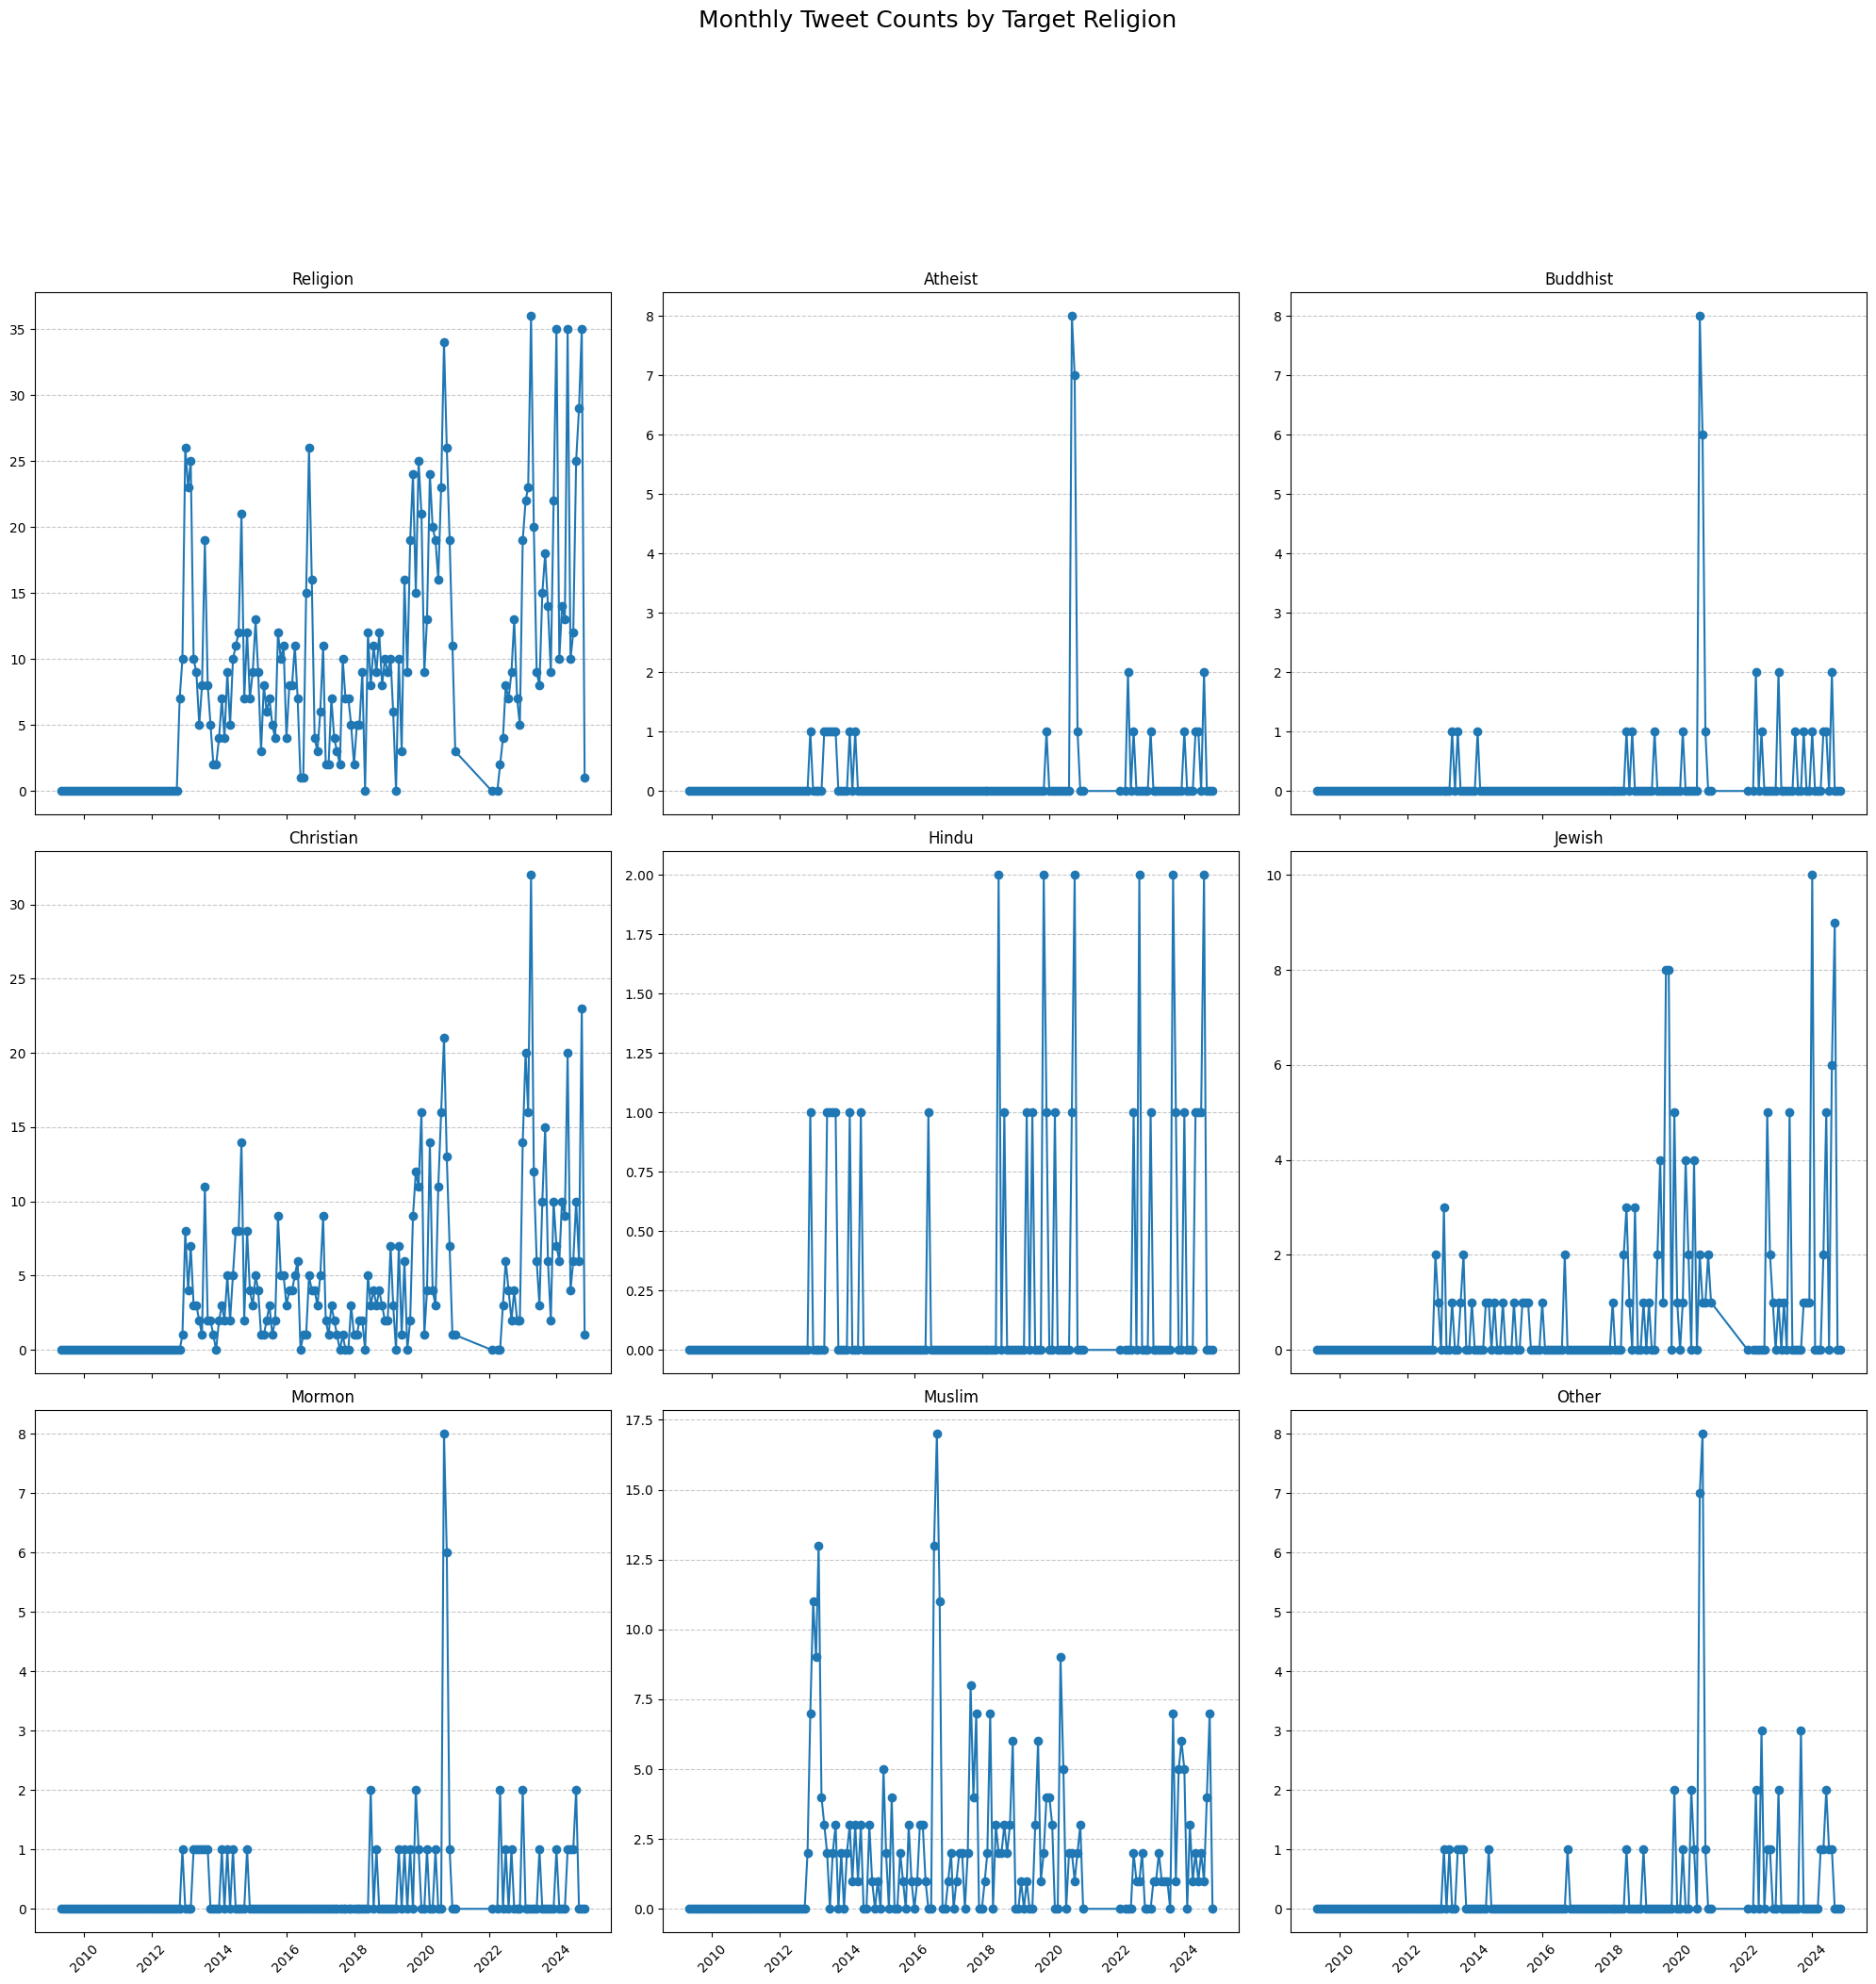

In [8]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'target_religion', 'target_religion_atheist', 'target_religion_buddhist', 'target_religion_christian', 'target_religion_hindu', 
    'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 'target_religion_other'
]

column_names = [
    'Religion', 'Atheist', 'Buddhist', 'Christian', 'Hindu', 
    'Jewish', 'Mormon', 'Muslim', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Religion', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()

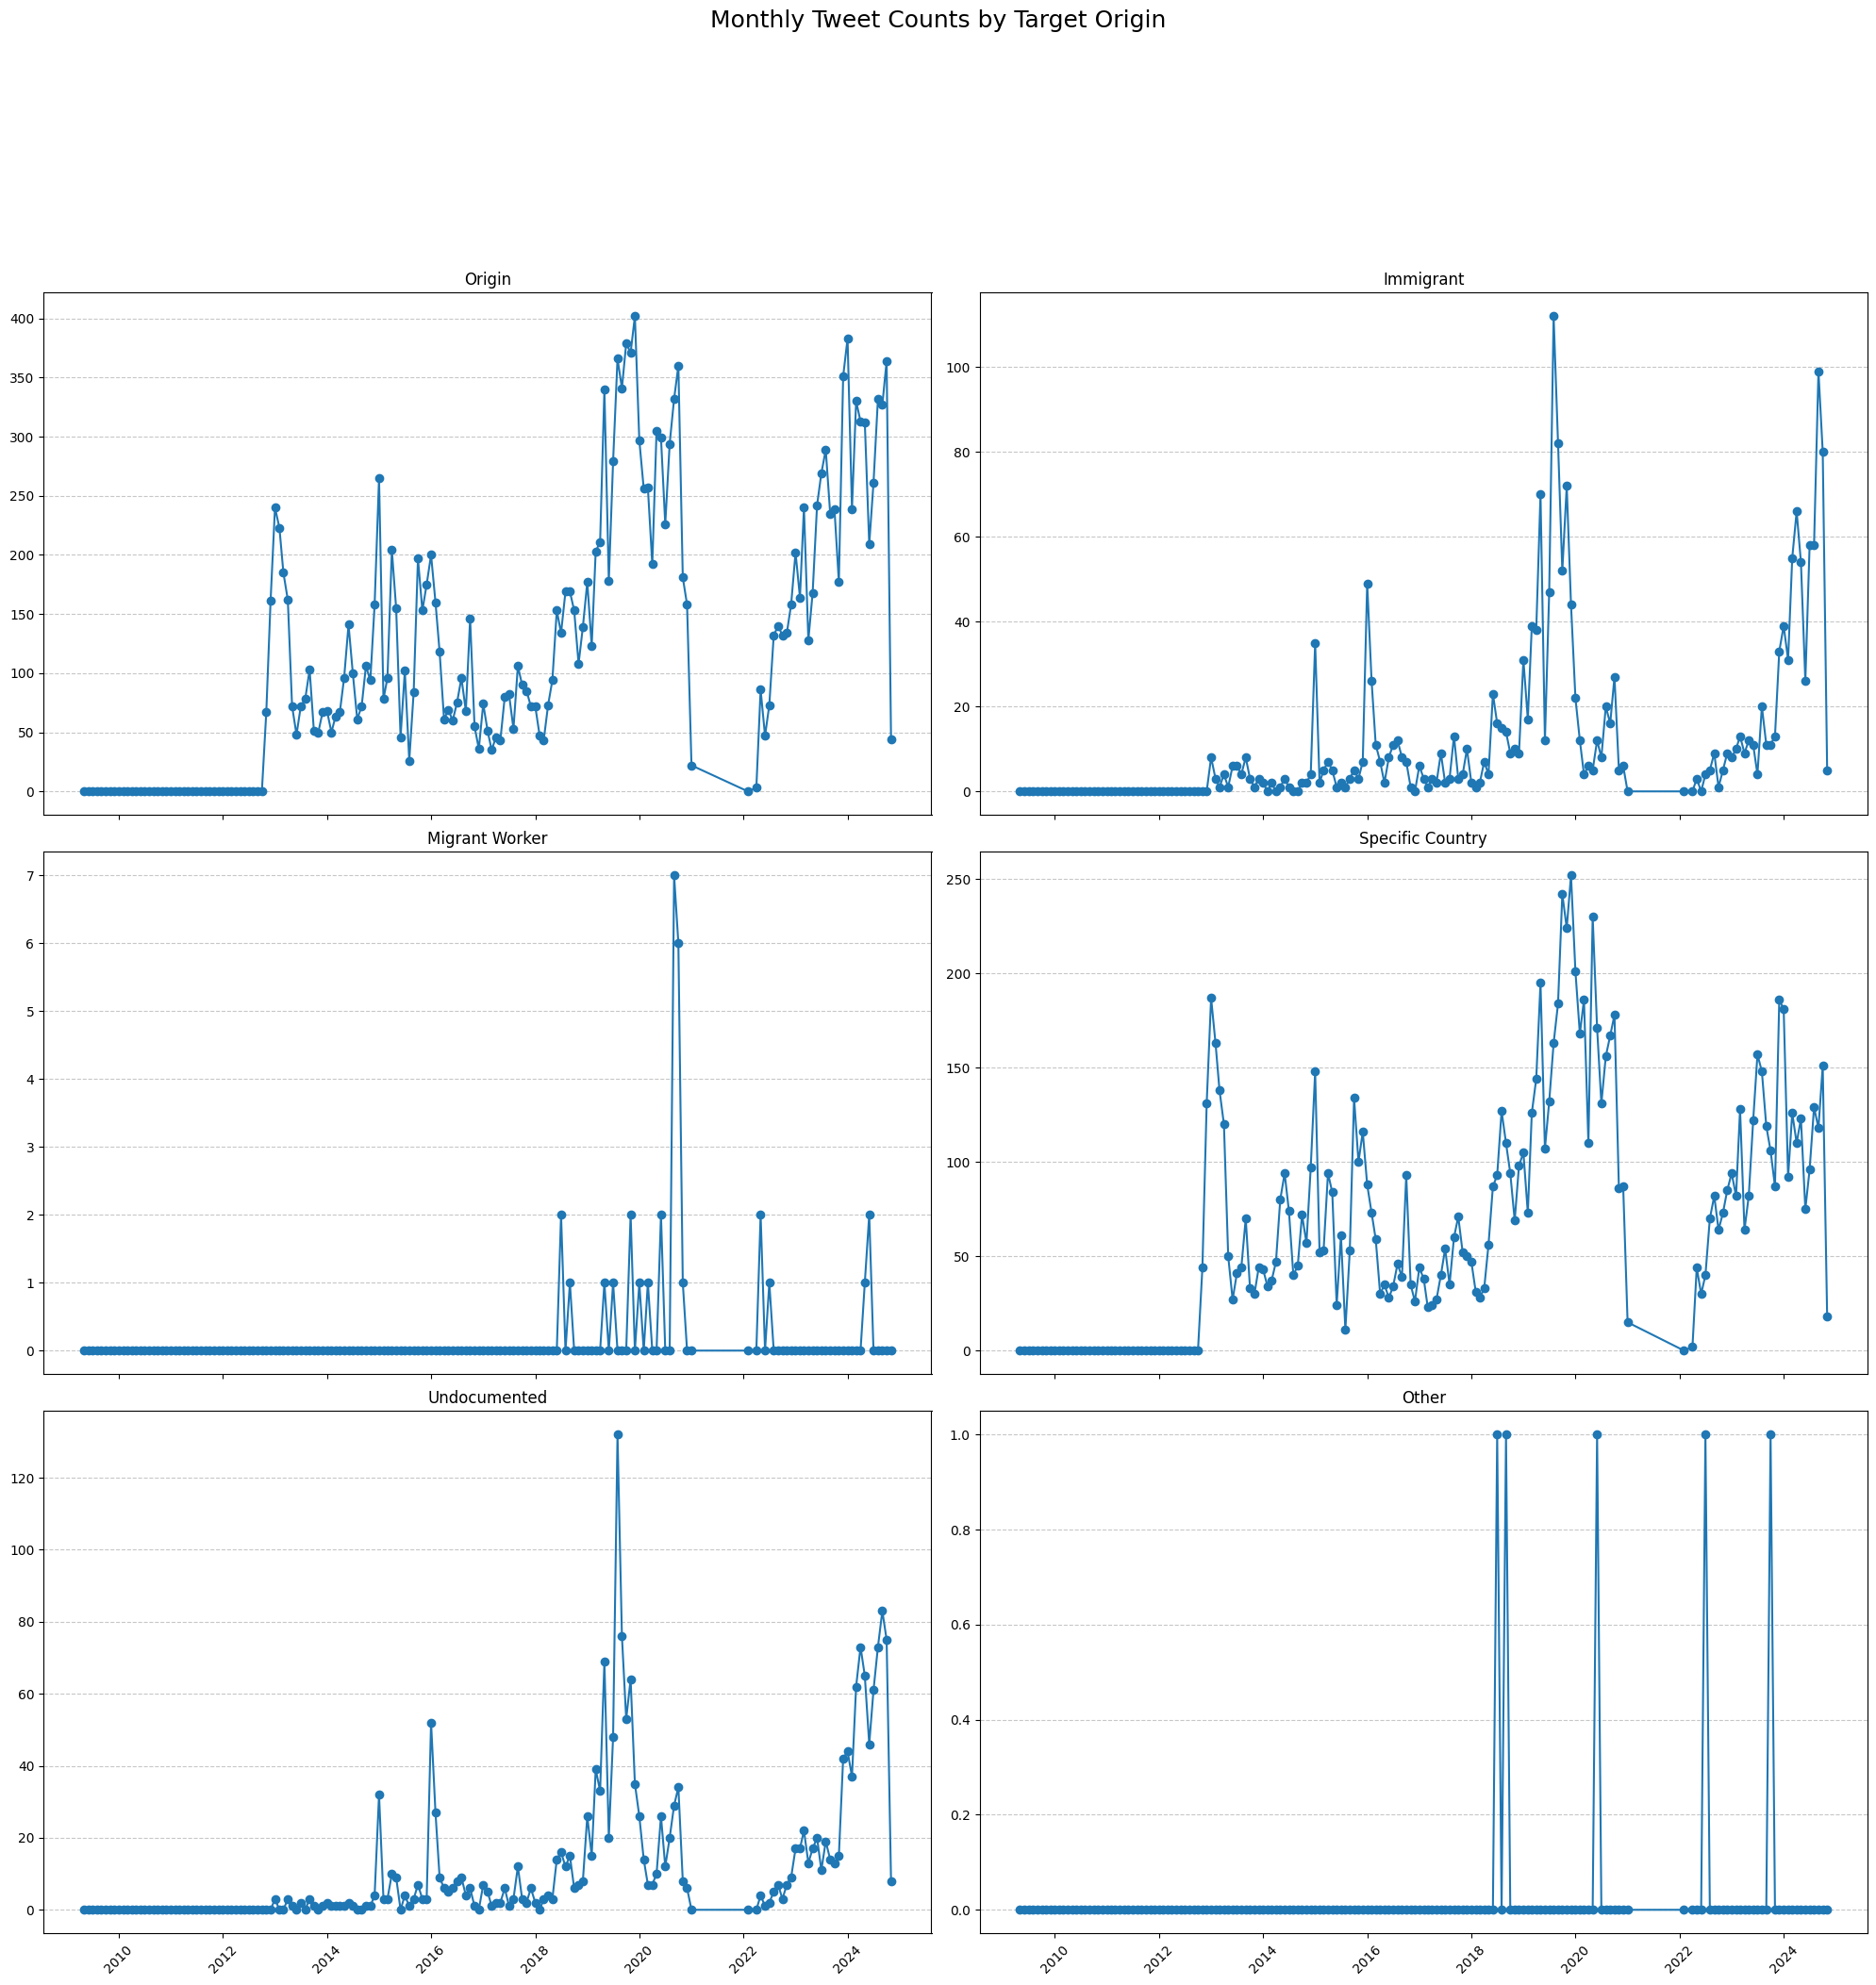

In [9]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'target_origin', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_specific_country',
    'target_origin_undocumented', 'target_origin_other'
]

column_names = [
    'Origin', 'Immigrant', 'Migrant Worker', 'Specific Country', 
    'Undocumented', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Origin', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()

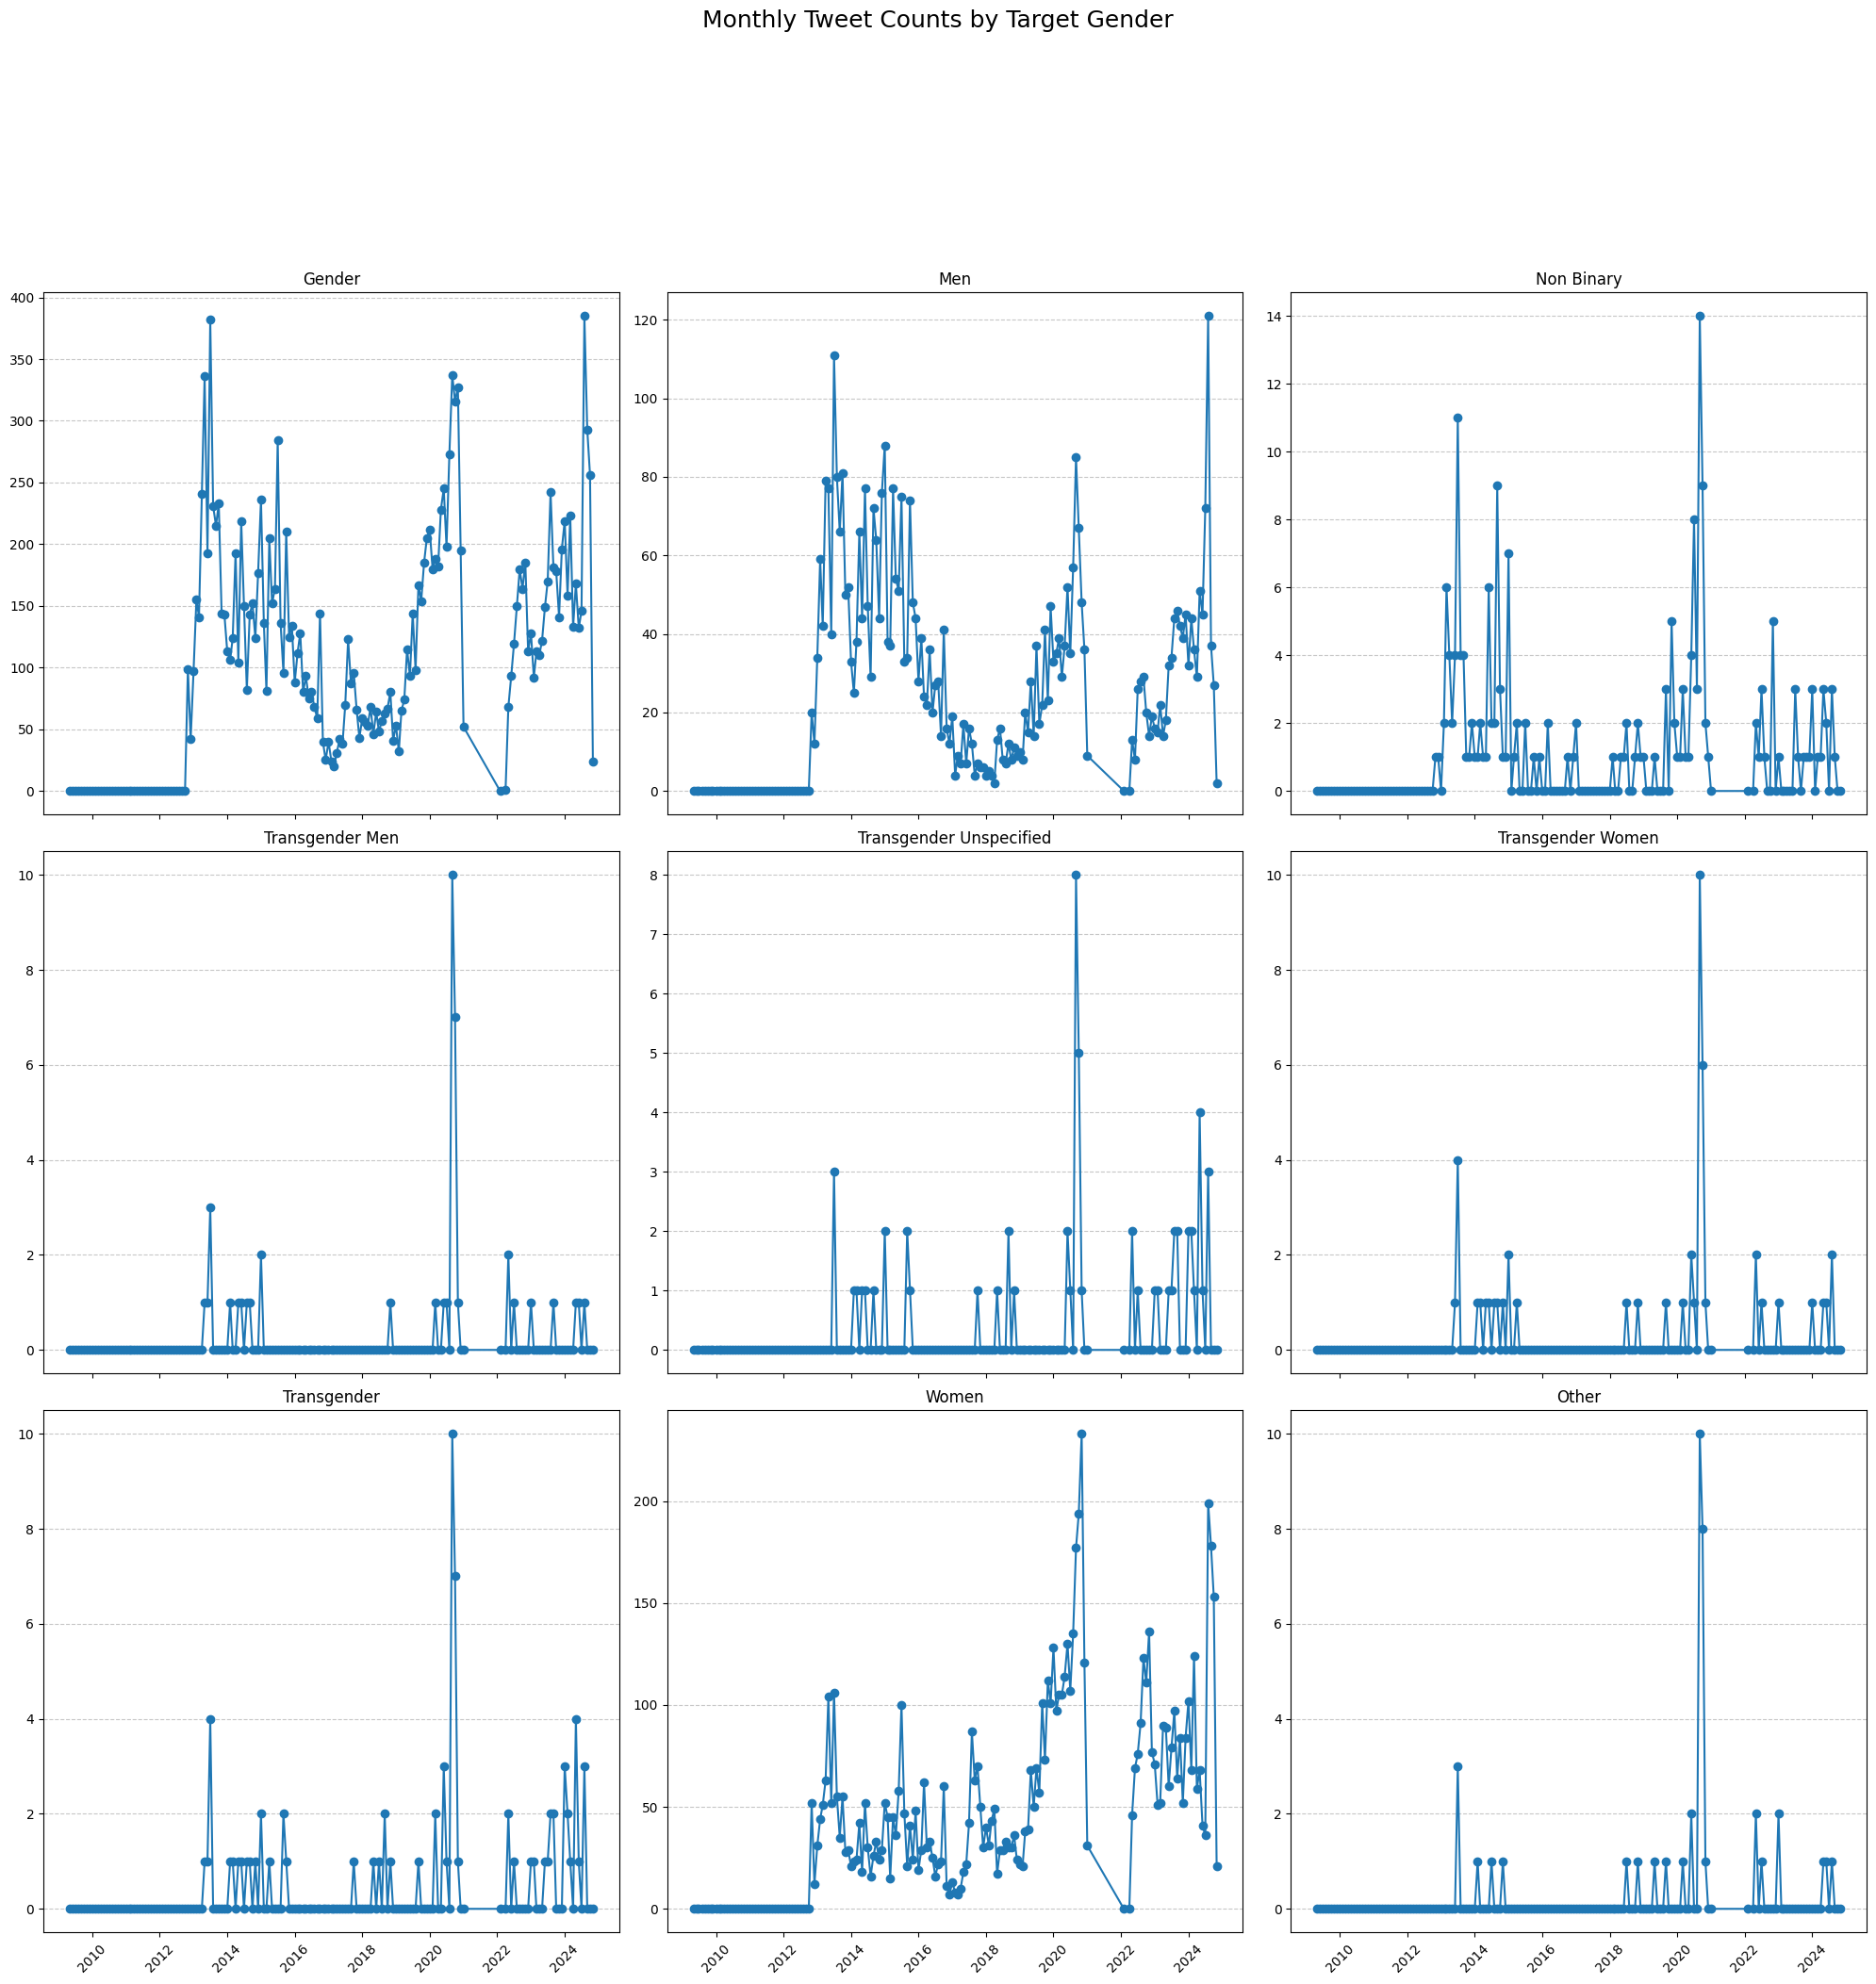

In [11]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

df['target_gender_transgender'] = (
    (df['target_gender_transgender_men'] == 1) |
    (df['target_gender_transgender_unspecified'] == 1) |
    (df['target_gender_transgender_women'] == 1)
).astype(int)

# List of columns to plot
columns_to_plot = [
    'target_gender', 'target_gender_men', 'target_gender_non_binary', 'target_gender_transgender_men',
    'target_gender_transgender_unspecified', 'target_gender_transgender_women', 'target_gender_transgender', 'target_gender_women', 'target_gender_other'
]

column_names = [
    'Gender', 'Men', 'Non Binary', 'Transgender Men', 
    'Transgender Unspecified', 'Transgender Women', 'Transgender', 'Women', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Gender', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()

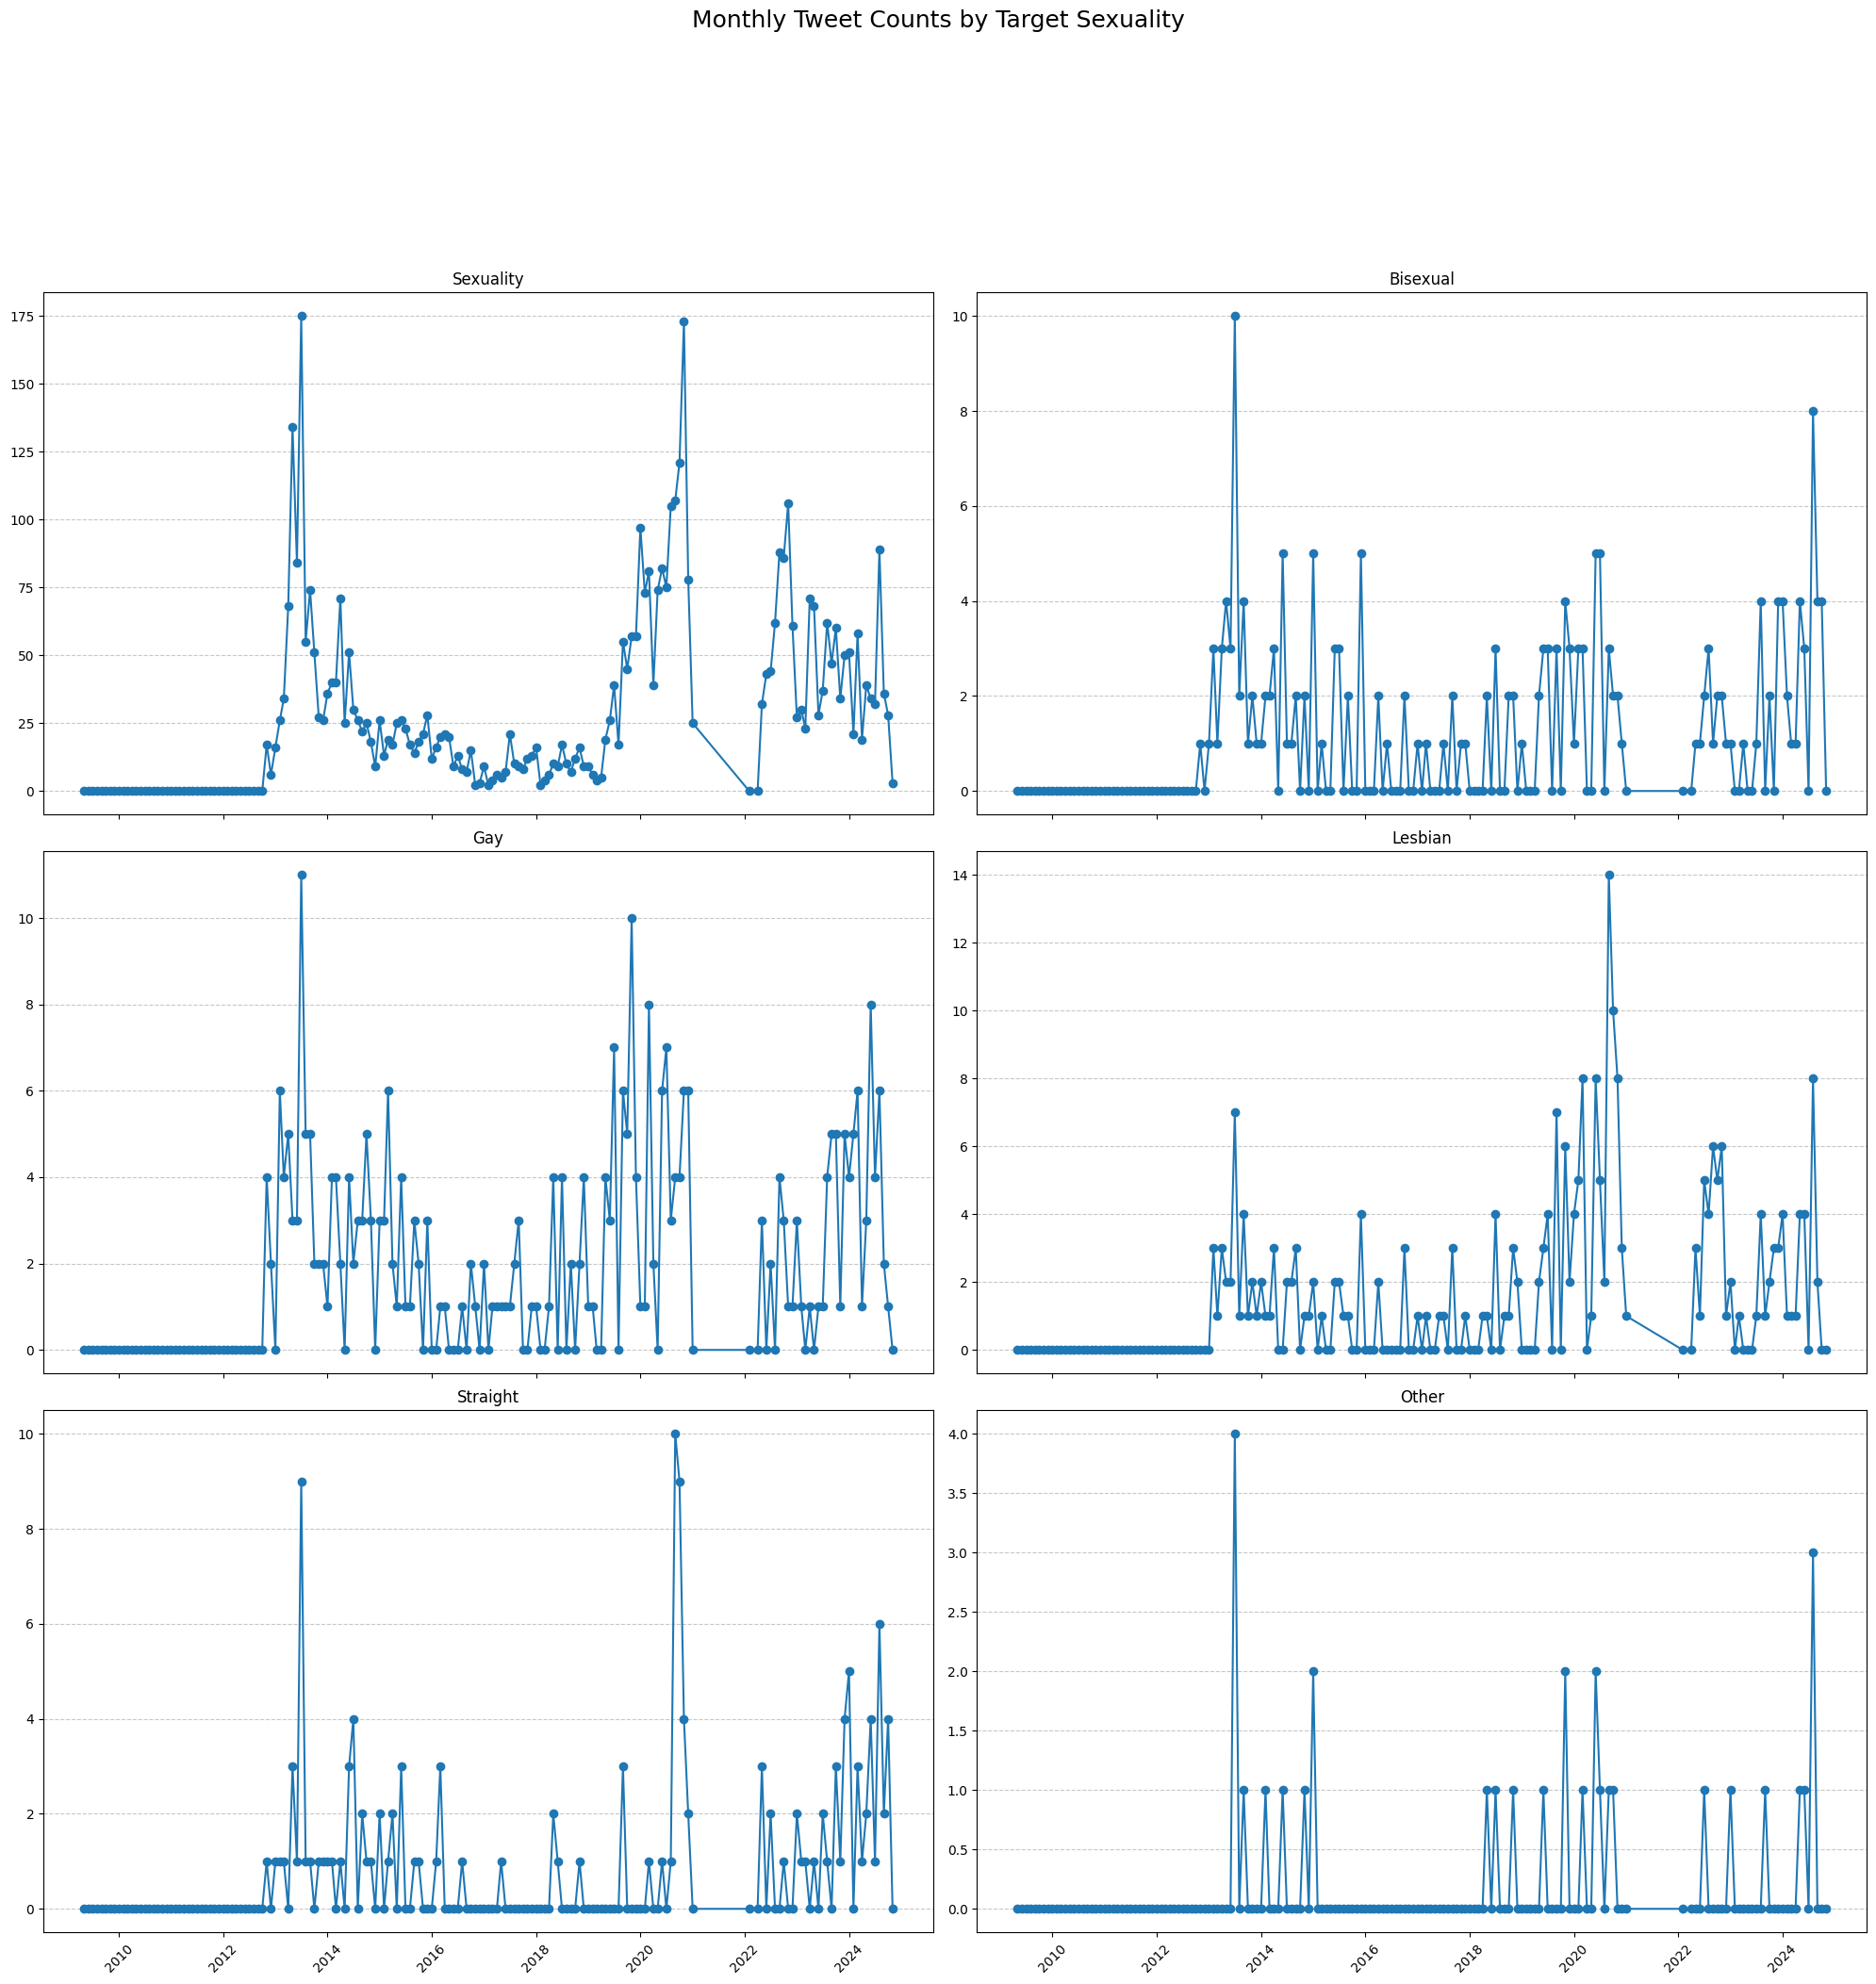

In [12]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'target_sexuality', 'target_sexuality_bisexual', 'target_sexuality_gay',
    'target_sexuality_lesbian', 'target_sexuality_straight', 'target_sexuality_other'
]

column_names = [
    'Sexuality', 'Bisexual', 'Gay', 'Lesbian', 
    'Straight', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Sexuality', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()

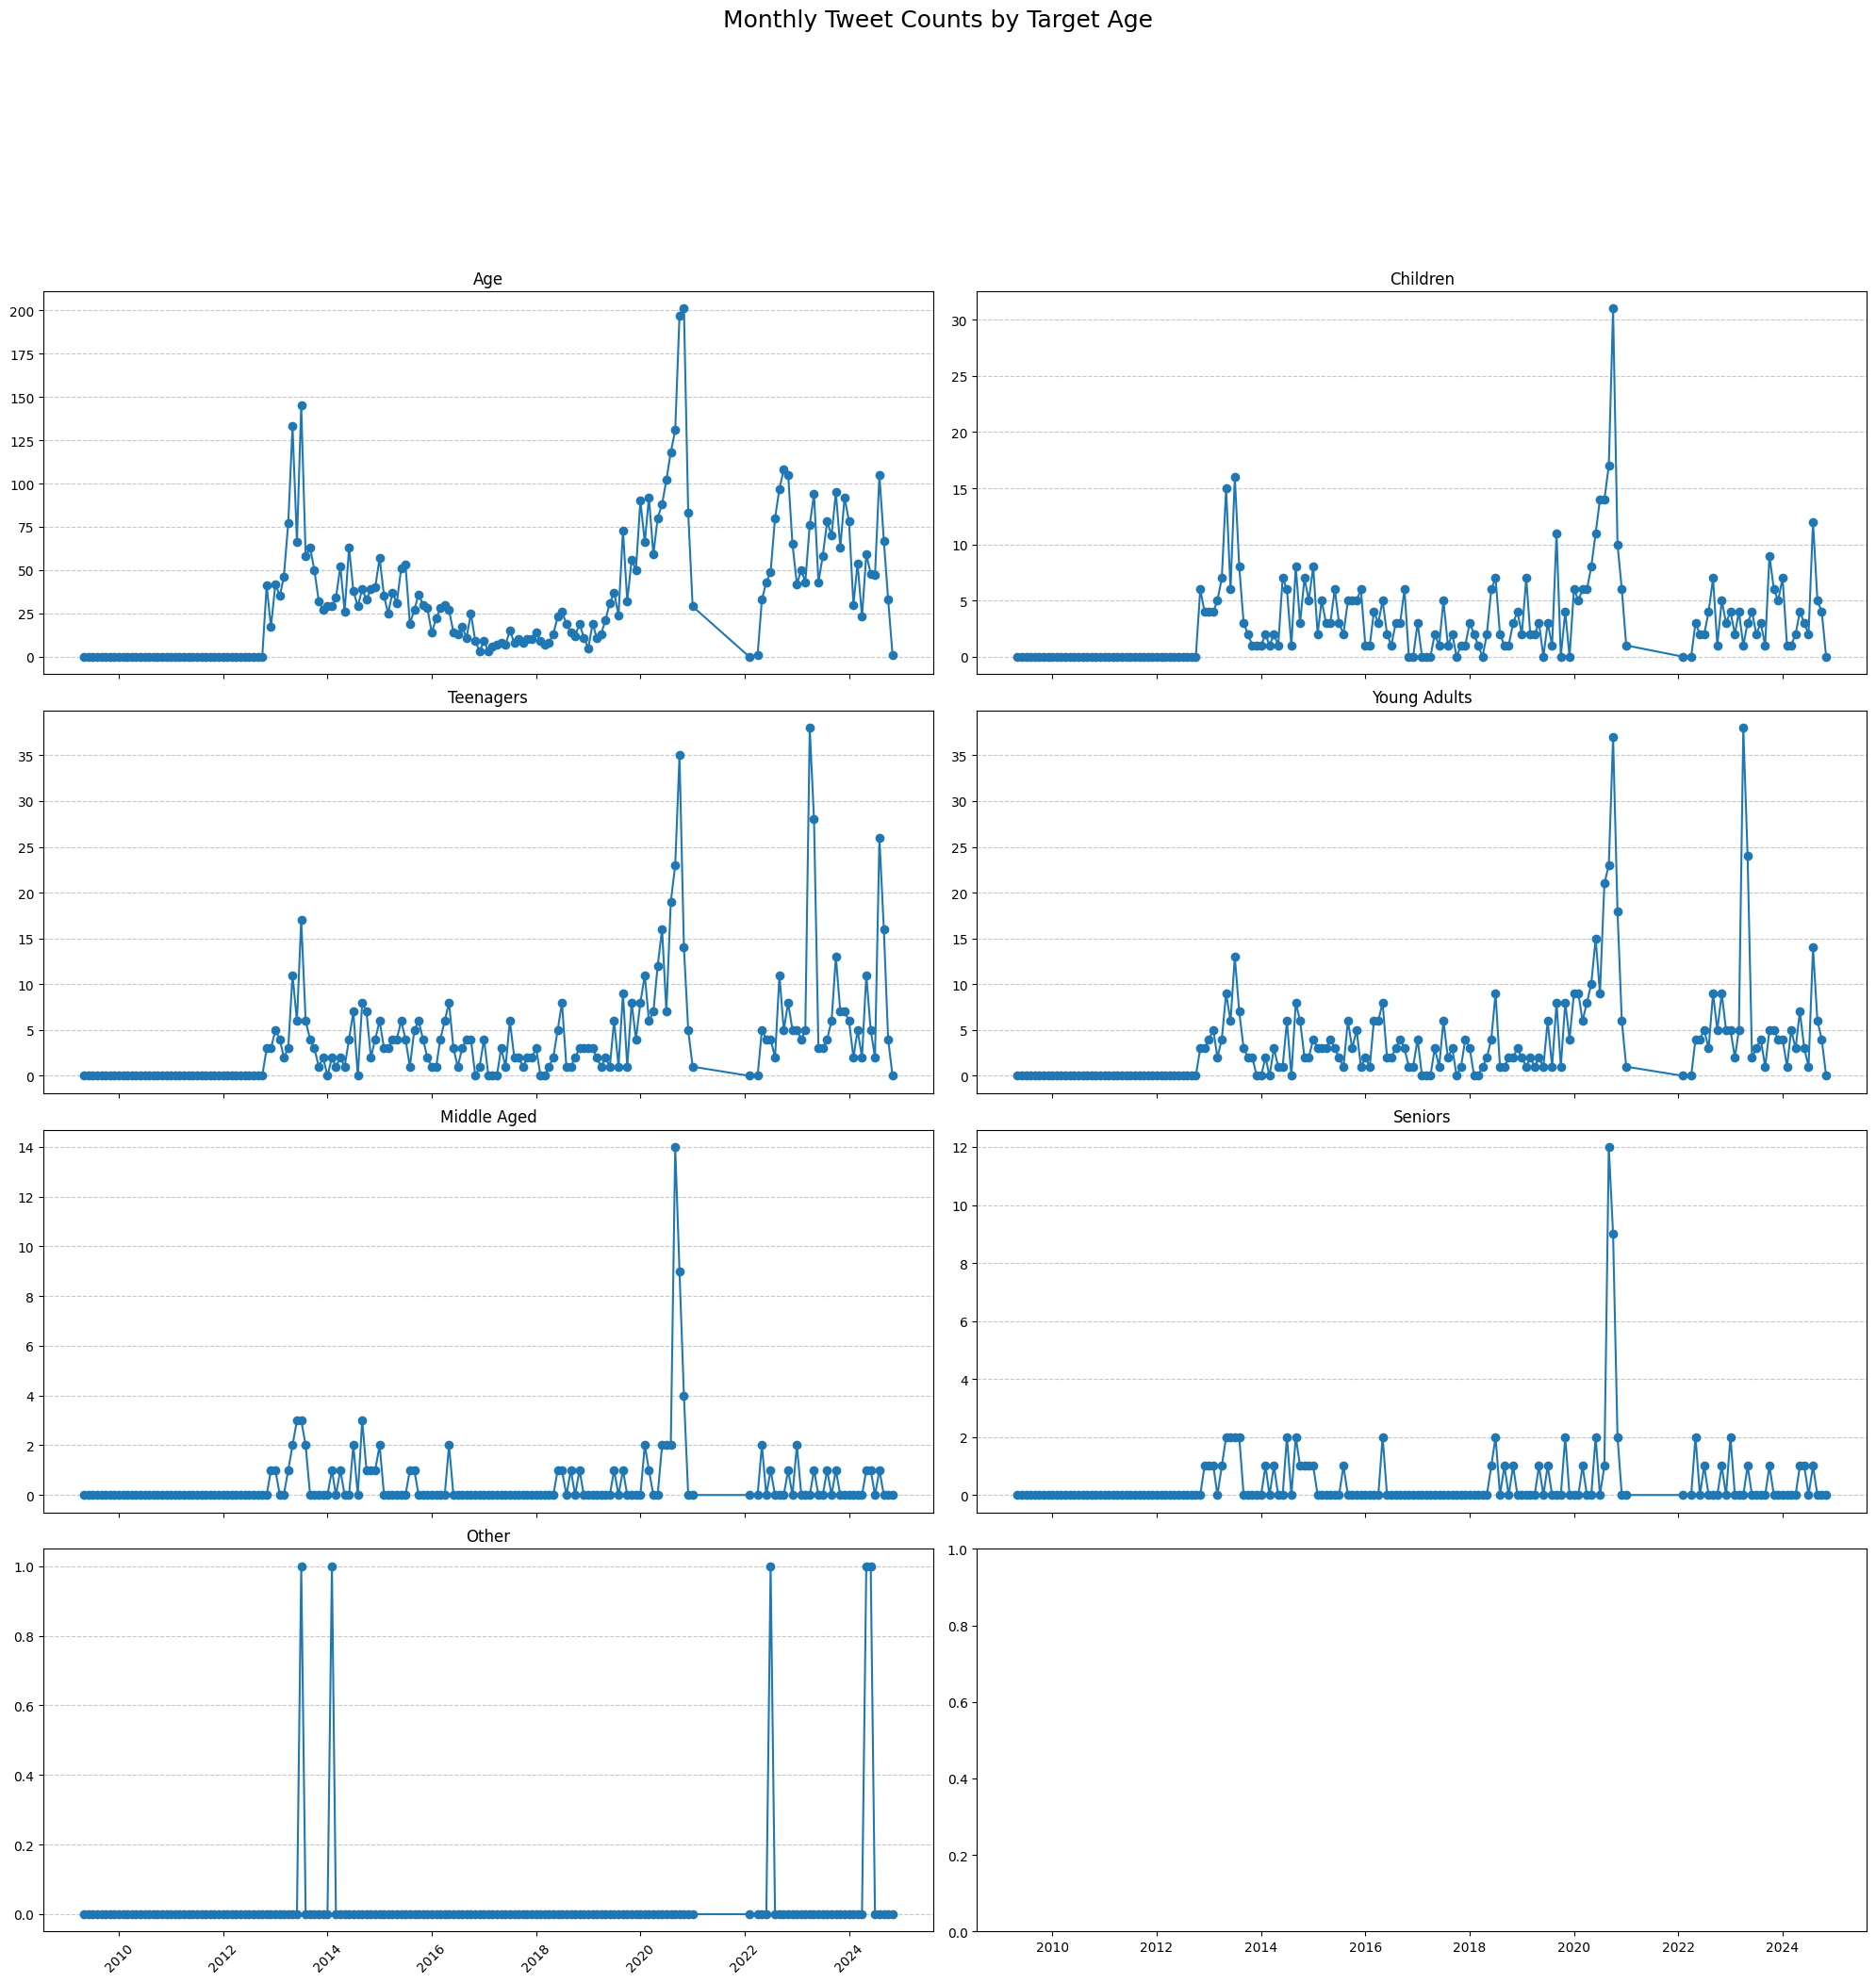

In [15]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'target_age', 'target_age_children', 'target_age_teenagers', 'target_age_young_adults',
    'target_age_middle_aged', 'target_age_seniors', 'target_age_other'
]

column_names = [
    'Age', 'Children', 'Teenagers', 'Young Adults', 
    'Middle Aged', 'Seniors', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Age', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)
plt.show()

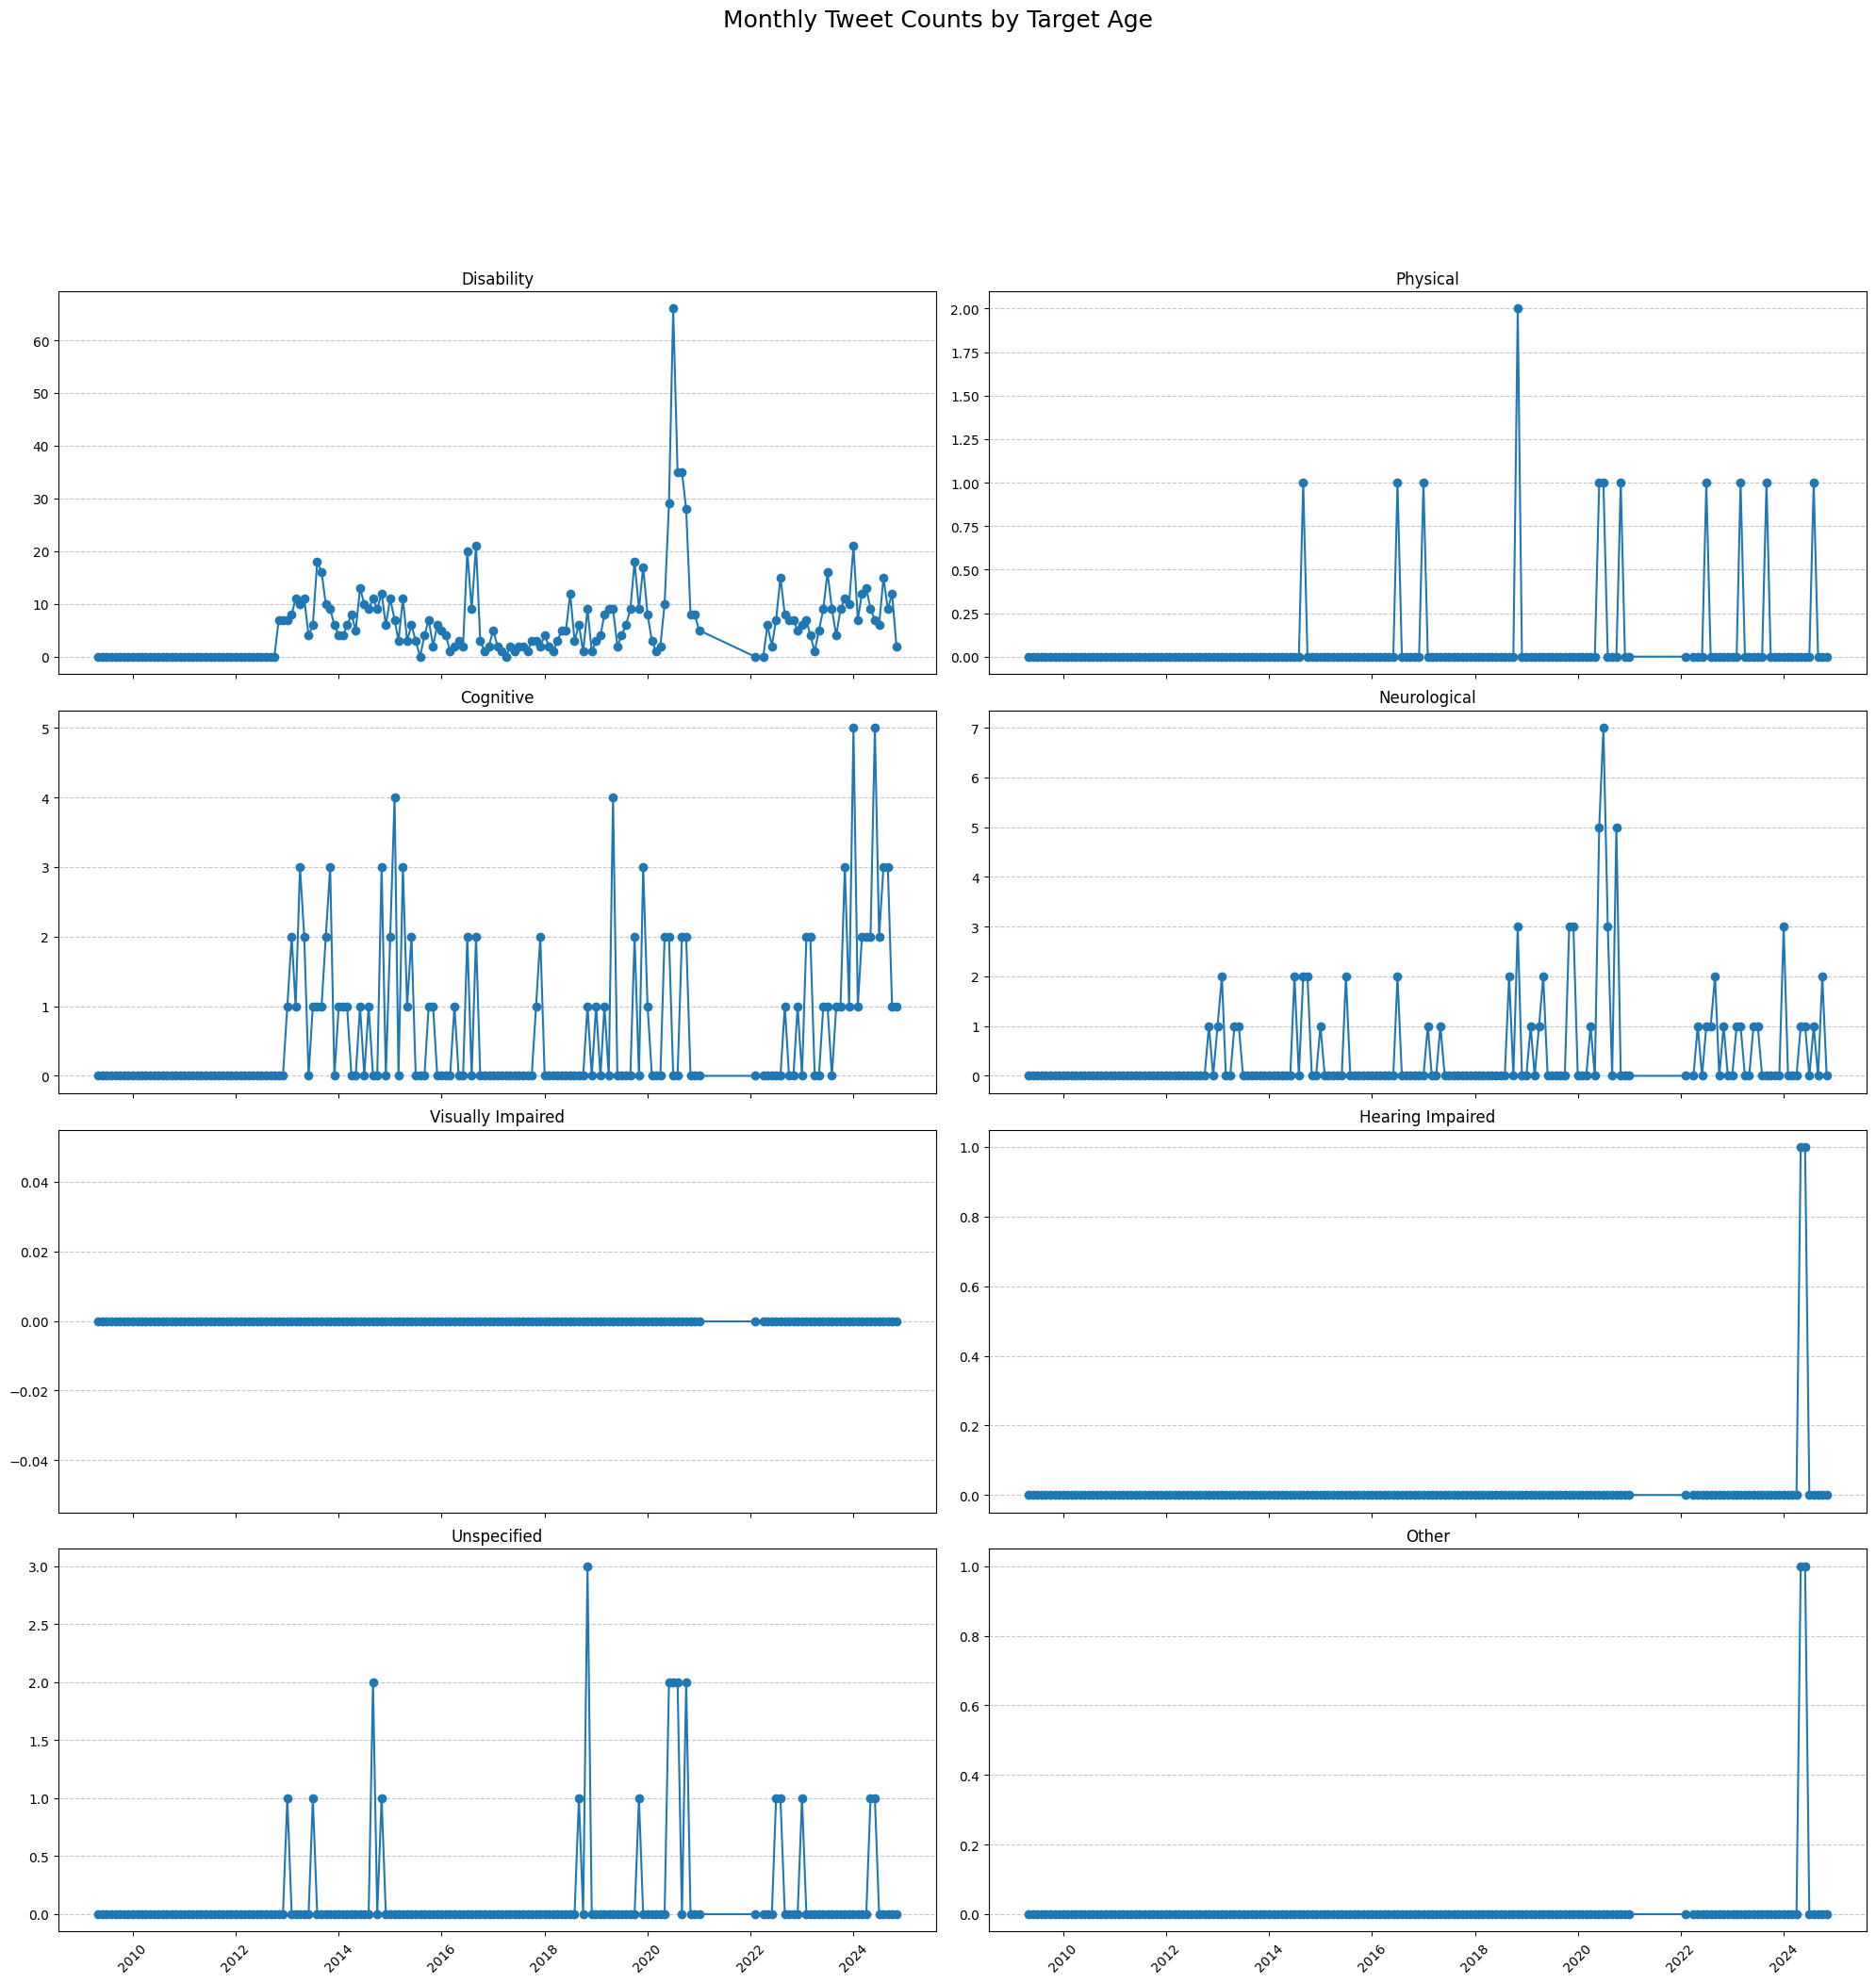

In [ ]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period
df['month_year'] = df['date'].dt.to_period('M')

# List of columns to plot
columns_to_plot = [
    'target_disability', 'target_disability_physical', 'target_disability_cognitive', 'target_disability_neurological',
    'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific', 'target_disability_other'
]

column_names = [
    'Disability', 'Physical', 'Cognitive', 'Neurological', 
    'Visually Impaired', 'Hearing Impaired', 'Unspecified', 'Other'
]

# Prepare figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    monthly_total = df.groupby('month_year').size()
    monthly_count = df[df[col] > 0].groupby('month_year').size()
    monthly_count = monthly_count.reindex(monthly_total.index, fill_value=0)
    
    # Convert Period index to datetime for plotting
    monthly_count.index = monthly_count.index.to_timestamp()
    
    ax.plot(monthly_count.sort_index(), marker='o')
    ax.set_title(column_names[i], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Layout cleanup
plt.tight_layout()
plt.suptitle('Monthly Tweet Counts by Target Age', fontsize=18, y=1.05)
plt.subplots_adjust(top=0.90)

plt.show()

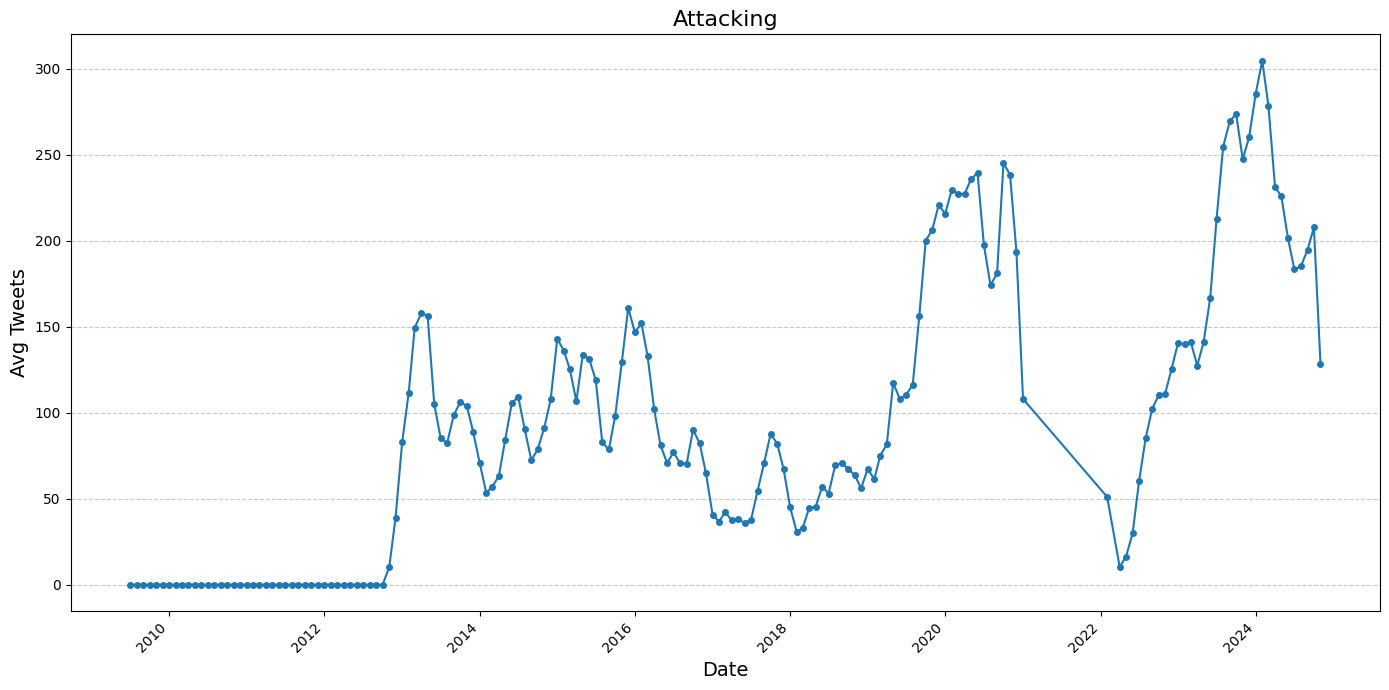

In [ ]:
col = 'attack_defend'

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create month-year period and group
df['month_year'] = df['date'].dt.to_period('M')
monthly_count = df.groupby('month_year')[col].sum()

# Convert index to datetime for rolling
monthly_count.index = monthly_count.index.to_timestamp()

# Apply 1-month running average (centered on current month)
rolling_avg = monthly_count.rolling(window=3).mean()

# Plot
plt.figure(figsize=(14, 7))
rolling_avg.plot(kind='line', marker='o', markersize=4)

plt.title('Attacking', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Tweets', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


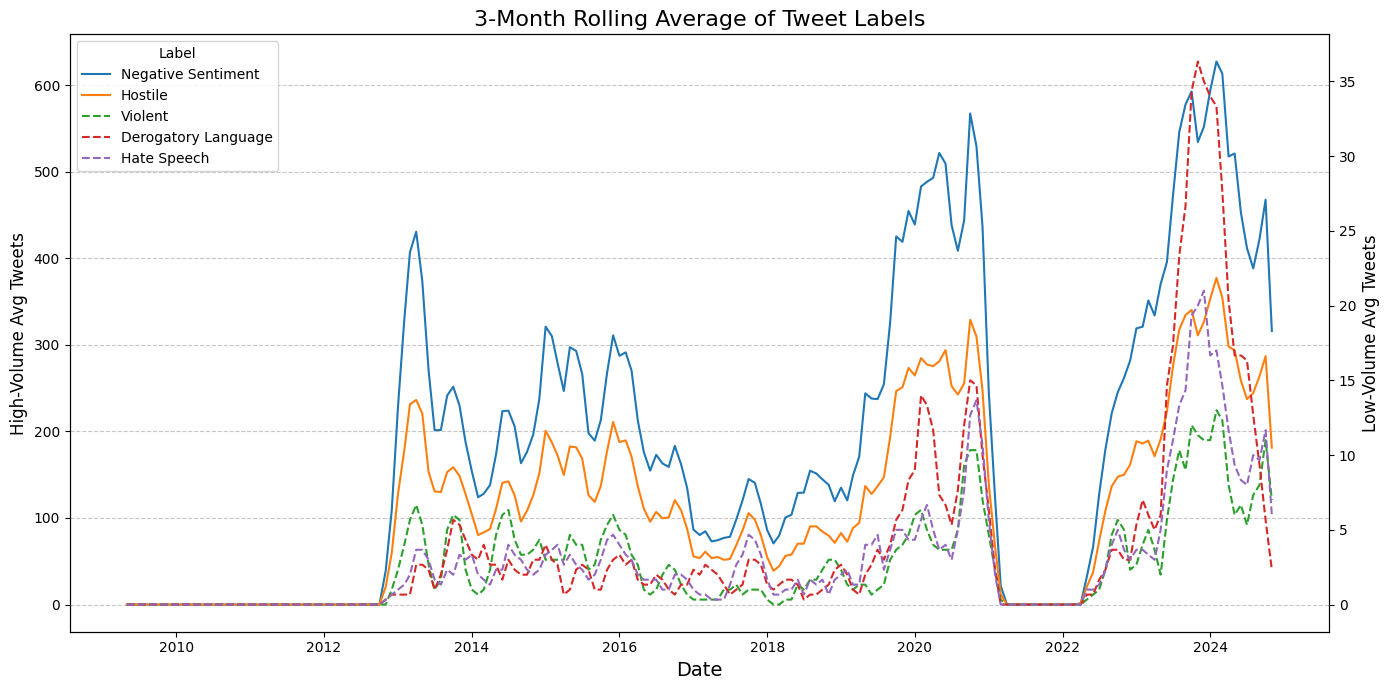

In [48]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month_year'] = df['date'].dt.to_period('M')

df['violence_total'] = (
    (df['genocide'] > 0) | 
    (df['violence'] > 0)
    ).astype(int)

df['hostility_total'] = (
    (df['respect'] > 0) | 
    (df['insult'] > 0) |
    (df['humiliate'] > 0) |
    (df['status'] > 0) |
    (df['attack_defend'] > 0)
    ).astype(int)

high_volume_cols = ['sentiment', 'hostility_total']
low_volume_cols = ['violence_total', 'hatespeech', 'hate_speech_score']
high_labels = ['Negative Sentiment', 'Hostile']
low_labels = ['Violent', 'Derogatory Language', 'Hate Speech']
high_colors = ['#1f77b4', '#ff7f0e']  # Blue, orange
low_colors = ['#2ca02c', '#d62728', '#9467bd']  # Green, red, purple

# Group and convert index
monthly_df = df.groupby('month_year')[high_volume_cols + low_volume_cols].sum()
monthly_df.index = monthly_df.index.to_timestamp()

# Fill in missing months with zeros
full_index = pd.date_range(start=monthly_df.index.min(), end=monthly_df.index.max(), freq='MS')
monthly_df = monthly_df.reindex(full_index, fill_value=0)

# Rolling average
rolling_avg = monthly_df.rolling(window=3, min_periods=1).mean()

# Set up figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot high-volume categories on primary y-axis
for col, label, color in zip(high_volume_cols, high_labels, high_colors):
    ax1.plot(rolling_avg.index, rolling_avg[col], marker='o', markersize=0, label=label, color=color)

ax1.set_ylabel('High-Volume Avg Tweets', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot low-volume categories on secondary y-axis
for col, label, color in zip(low_volume_cols, low_labels, low_colors):
    ax2.plot(rolling_avg.index, rolling_avg[col], marker='s', linestyle='--', markersize=0, label=label, color=color)

ax2.set_ylabel('Low-Volume Avg Tweets', fontsize=12)
ax2.tick_params(axis='y')

# Title and labels
plt.title('3-Month Rolling Average of Tweet Labels', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, title="Label", loc='upper left')

plt.tight_layout()
plt.show()


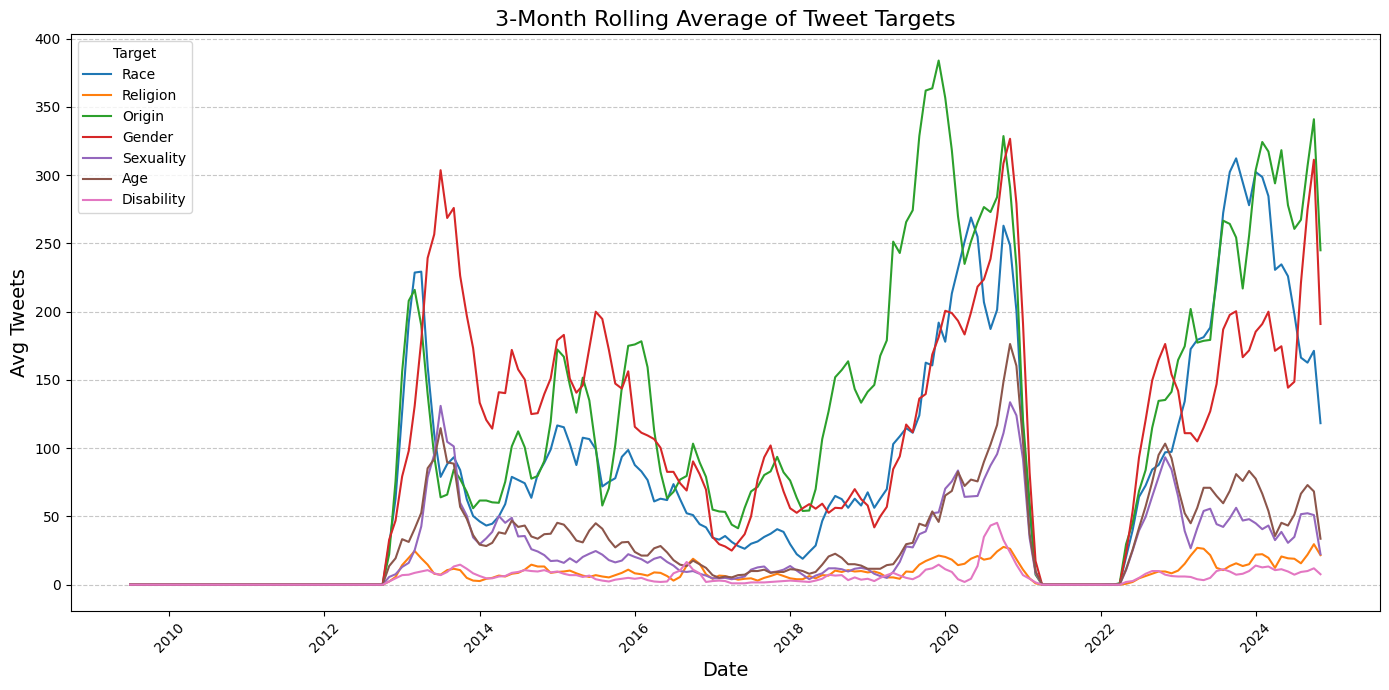

In [ ]:
# Convert month-year index to timestamp
monthly_df = df.groupby('month_year')[
    ['target_race', 'target_religion', 'target_origin', 'target_gender', 'target_sexuality', 'target_age', 'target_disability']
].sum()
monthly_df.index = monthly_df.index.to_timestamp()

categories = ['Race', 'Religion', 'Origin', 'Gender', 'Sexuality', 'Age', 'Disability']

# Fill in missing months with zeros
full_index = pd.date_range(start=monthly_df.index.min(), end=monthly_df.index.max(), freq='MS')
monthly_df = monthly_df.reindex(full_index, fill_value=0)

# Rolling average
rolling_avg = monthly_df.rolling(window=3, min_periods=1).mean()

# Apply 3-month rolling average
rolling_avg = monthly_df.rolling(window=3).mean()

# Plot all selected columns
plt.figure(figsize=(14, 7))

for i, col in enumerate(rolling_avg.columns):
    plt.plot(rolling_avg.index, rolling_avg[col], marker='o', markersize=0, label=categories[i])

plt.title('3-Month Rolling Average of Tweet Targets', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Tweets', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Target")
plt.tight_layout()
plt.show()

In [78]:
# Define category conditions
conditions = {
    'Sentiment': ('sentiment', 0),
    'Hostility': ('hostility_total', 0),
    'Violence': ('violence_total', 0),
    'Derogatory Language': ('hatespeech', 0),
    'Hate Speech': ('hate_speech_score', 0),
}

# Collect average engagement data
data = {}

for label, (col, threshold) in conditions.items():
    pos_key = f'Not {label}' if label != 'Sentiment' else 'Positive'
    neg_key = label if label != 'Sentiment' else 'Negative'

    pos_df = df[df[col] == threshold]
    neg_df = df[df[col] > threshold]

    data[pos_key] = {
        'Favorites': pos_df['favorites'].mean(),
        'Retweets': pos_df['retweets'].mean(),
    }
    data[neg_key] = {
        'Favorites': neg_df['favorites'].mean(),
        'Retweets': neg_df['retweets'].mean(),
    }

# Create summary DataFrame
summary = pd.DataFrame(data).T
summary['Total Engagement'] = summary['Favorites'] + summary['Retweets']

# Build comparison table
rows = []
for label, (_, _) in conditions.items():
    pos_label = f'Not {label}' if label != 'Sentiment' else 'Positive'
    neg_label = label if label != 'Sentiment' else 'Negative'

    pos = summary.loc[pos_label]
    neg = summary.loc[neg_label]

    rows.append({
        'Label': label,
        'Engagement (Neg)': round(neg['Total Engagement'], 2),
        'Engagement (Pos)': round(pos['Total Engagement'], 2),
        'Difference': round(neg['Total Engagement'] - pos['Total Engagement'], 2),
        'Percent Difference': round((neg['Total Engagement'] - pos['Total Engagement']) / pos['Total Engagement'] * 100, 2),
    })

comparison_df = pd.DataFrame(rows).sort_values(by='Difference', ascending=False).reset_index(drop=True)
display(comparison_df)


Label  Engagement (Neg)  Engagement (Pos)  Difference  \
0          Hate Speech          34294.58          32240.74     2053.84   
1            Hostility          31235.98          30647.49      588.49   
2            Sentiment          31750.27          32694.30     -944.04   
3  Derogatory Language          29902.68          32279.60    -2376.92   
4             Violence          27180.34          30825.79    -3645.45   

   Percent Difference  
0                6.37  
1                1.92  
2               -2.89  
3               -7.36  
4              -11.83